# 1. Problem Statement
With the growth of e-commerce websites, people and financial companies rely on online services
to carry out their transactions that have led to an exponential increase in the credit card frauds 
1. Fraudulent credit card transactions lead to a loss of huge amount of money. The design of an effective fraud detection system is necessary in order to reduce the losses incurred by the customers and financial companies
2. Research has been done on many models and methods to
prevent and detect credit card frauds. Some credit card fraud transaction datasets contain the problem of imbalance in datasets. A good fraud detection system should be able to identify the fraud transaction accurately and should make the detection possible in real-time transactions. 

### About the Dataset
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

## Data Dictionary<br>
trans_date_trans_time -> Transaction time stamp<br>
cc_num -> Credit card number<br>
merchant -> merchant name<br>
category -> transaction category<br>
amt -> Transaction amount<br>
first -> First name of card holder<br>
last -> Last name of card holder<br>
gender -> Sex of card holder<br>
street -> transaction address<br>
city -> transaction city<br>
state -> transaction state<br>
zip -> transaction zipcode<br>
lat -> transaction lattitude<br>
long -> transaction longitude<br>
city_pop -> Population of the city<br>
job -> job of the card holder<br>
dob -> date of birth of card holder<br>
trans_num -> transaction number of transaction<br>
unix_time -> time in unix format<br>
merch_lat -> lattitude of the merchant<br>
merch_long -> longitude of merchant<br>
is_fraud -> nature of transaction (fraud or not fraud)<br>

## Our Goals:
1. Understand the little distribution of the "little" data that was provided to us.

2. Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions.

3. Determine the Classifiers we are going to use and decide which one has a higher accuracy.

### 1. Import libraries

In [1]:
# Data preprocessing libraries
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

import os
import sqlite3
import math
from collections import Counter
from pathlib import Path
from tqdm import tqdm

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

# Model
from scipy.stats import skew
import yellowbrick
import sklearn
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Config
mpl.rcParams['font.family'] = 'monospace' 
sns.set_theme(style="white", palette=None)
plotly.offline.init_notebook_mode() 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
%matplotlib inline

# Data preprocessing

In [27]:
# Reading csv files and drop the first column
fraud = pd.read_csv(r"fraudTrain.csv")


fraud_test = pd.read_csv(r"fraudTest.csv")


# First view 10 rows
fraud.head(10)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   
5           5   2019-01-01 00:04:08  4767265376804500   
6           6   2019-01-01 00:04:42    30074693890476   
7           7   2019-01-01 00:05:08  6011360759745864   
8           8   2019-01-01 00:05:18  4922710831011201   
9           9   2019-01-01 00:06:01  2720830304681674   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   
5    fraud_Stroman, Hudson and Erdman  gas_transport   94.63   Jennifer   
6               fraud_Rowe-Vandervort    grocery_net   44.54     Kelsey   
7                fraud_Corwin-Collins  gas_transport   71.65     Steven   
8                    fraud_Herzog Ltd       misc_pos    4.27    Heather   
9   fraud_Schoen, Kuphal and Nitzsche    grocery_pos  198.39    Melissa   

       last gender                          street  ...      lat      long  \
0     Banks      F                  561 Perry Cove  ...  36.0788  -81.1781   
1      Gill      F    43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2   Sanchez      M        594 White Dale Suite 530  ...  42.1808 -112.2620   
3     White      M     9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4    Garcia      M                408 Bradley Rest  ...  38.4207  -79.4629   
5    Conner      F               4655 David Island  ...  40.3750  -75.2045   
6  Richards      F     889 Sarah Station Suite 624  ...  37.9931 -100.9893   
7  Williams      M       231 Flores Pass Suite 720  ...  38.8432  -78.6003   
8     Chase      F     6888 Hicks Stream Suite 954  ...  40.3359  -79.6607   
9   Aguilar      F  21326 Taylor Squares Suite 708  ...  36.5220  -87.3490   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   
5      2158                  Transport planner  1961-06-19   
6      2691                    Arboriculturist  1993-08-16   
7      6018               Designer, multimedia  1947-08-21   
8      1472          Public affairs consultant  1941-03-07   
9    151785                        Pathologist  1974-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1325376248  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1325376282  37.162705 -100.153370   
7  6d294ed2cc447d2c71c7171a3d54967c  1325376308  38.948089  -78.540296   
8  fc28024ce480f8ef21a32d64c93a29f5  1325376318  40.351813  -79.958146   
9  3b9014ea8fb80bd65de0b1463b00b00e  1325376361  37.179198  -87.485381   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         0  
8         0  
9         0  

[10 rows x 23 columns]

In [28]:
fraud.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Exploratory Data Analysis
1. Univariate Analysis
2. Bivariate Analysis
3. Data Cleaning
4. Outlier Treatment
5. Variable Transformation

In [29]:
# checking for various columns and nulls in the dataset
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              



*   70% data is present in the train dataset and remaining 30% in the test dataset.
*   No null values in either of the files




In [30]:
# Check for imbalance on target variable in the train dataset
fraud.is_fraud.value_counts(normalize=True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

Fraud Distribution
is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64


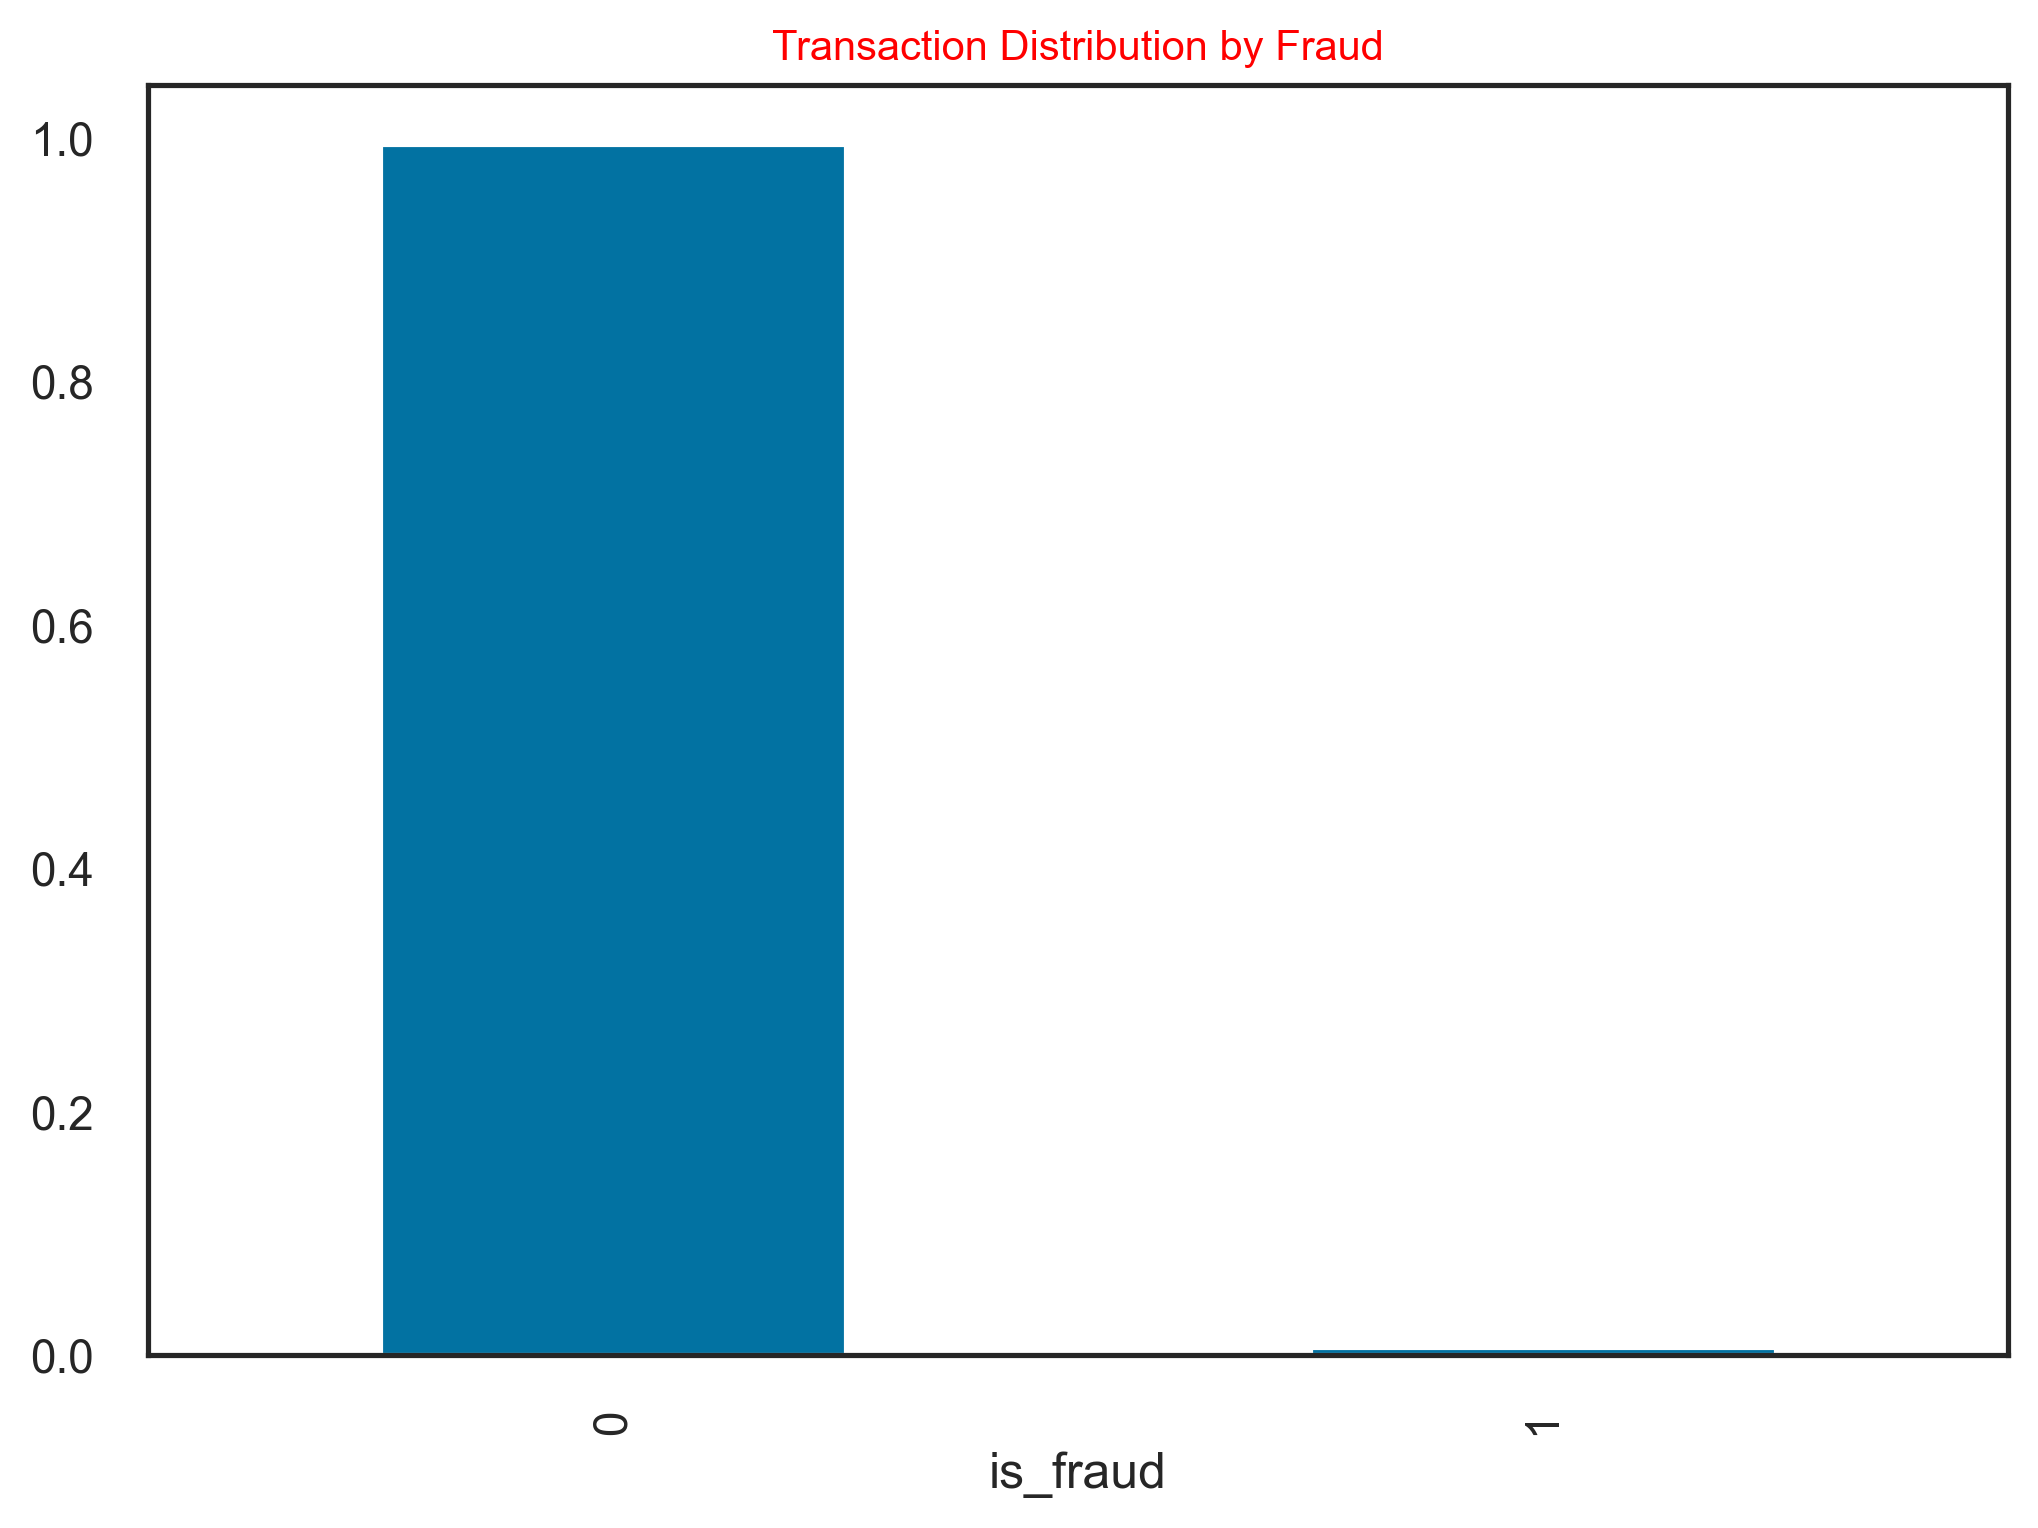

In [31]:
# Check for imbalance on target variable in the main dataset
print ('Fraud Distribution')
print (fraud.is_fraud.value_counts(normalize=True))
plt.title('Transaction Distribution by Fraud', fontsize= 10, color = 'Red', fontweight = 100)
fraud.is_fraud.value_counts(normalize=True).plot.bar()
plt.show()

In [32]:
# Check for imbalance on target variable in the test dataset
fraud_test.is_fraud.value_counts(normalize=True)

is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64

Both the datasets have high imbalnce of the target variable with the test dataset having slightly higher imbalance. At this point, lets keep the test data seperate. We will be building the model on the train dataset. If required, a validation dataset will be carved from it. The final evaluation will be done on the test dataset.

## Univariate Analysis
The following columns seems of very less/ no significance in determining a fraud case. Primary reason being no model can be created based on person's name or his PII or some unique ID/ S.no. assigned. Hence, dropping them:-

1. cc_num
2. first
3. last
4. street
5. trans_num

In [33]:
# Dropping the unwanted columns from both datasets
fraud.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud.drop(fraud.iloc[:,[0]], axis=1, inplace=True)
fraud_test.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud_test.drop(fraud_test.iloc[:,[0]], axis=1, inplace=True)

In [34]:
# Inspecting the fraud dataset
fraud.head()

trans_date_trans_time                            merchant       category  \
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

      amt gender            city state    zip      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1  107.23      F          Orient    WA  99160  48.8878 -118.2105       149   
2  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154   
3   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939   
4   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job         dob   unix_time  merch_lat  \
0          Psychologist, counselling  1988-03-09  1325376018  36.011293   
1  Special educational needs teacher  1978-06-21  1325376044  49.159047   
2        Nature conservation officer  1962-01-19  1325376051  43.150704   
3                    Patent attorney  1967-01-12  1325376076  47.034331   
4     Dance movement psychotherapist  1986-03-28  1325376186  38.674999   

   merch_long  is_fraud  
0  -82.048315         0  
1 -118.186462         0  
2 -112.154481         0  
3 -112.561071         0  
4  -78.632459         0

In [35]:
# Inspecting the fraud test dataset
fraud_test.head()

trans_date_trans_time                              merchant        category  \
0   2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1   2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2   2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3   2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4   2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

     amt gender        city state    zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209  33.9659  -80.9355    333497   
1  29.84      F     Altonah    UT  84002  40.3207 -110.4360       302   
2  41.28      F    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  60.05      M  Titusville    FL  32780  28.5697  -80.8191     54767   
4   3.19      M    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job         dob   unix_time  merch_lat  merch_long  \
0     Mechanical engineer  1968-03-19  1371816865  33.986391  -81.200714   
1  Sales professional, IT  1990-01-17  1371816873  39.450498 -109.960431   
2       Librarian, public  1970-10-21  1371816893  40.495810  -74.196111   
3            Set designer  1987-07-25  1371816915  28.812398  -80.883061   
4      Furniture designer  1955-07-06  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [36]:
# Converting dob to age
# from datetime import date
# fraud['dob'] = pd.to_datetime(fraud['dob'])
# fraud['age'] = (pd.to_datetime('now') - fraud['dob'])/ np.timedelta64(1, 'Y')
# fraud['age'] = fraud['age'].astype(int)
# fraud.drop(['dob'], axis=1, inplace=True)
# fraud.head()

from datetime import date
import numpy as np
import pandas as pd

fraud['dob'] = pd.to_datetime(fraud['dob'])

# 1. take the timedelta in *days*            (unit 'D' **is** supported)
# 2. convert days → years by dividing by 365.2425 (mean days per calendar year)
fraud['age'] = ((pd.to_datetime('now') - fraud['dob'])
                / np.timedelta64(1, 'D')            # days as float
                / 365.2425)                         # days → years
fraud['age'] = fraud['age'].astype(int)             # integer ages

fraud.drop(columns='dob', inplace=True)
fraud.head()

trans_date_trans_time                            merchant       category  \
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

      amt gender            city state    zip      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1  107.23      F          Orient    WA  99160  48.8878 -118.2105       149   
2  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154   
3   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939   
4   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job   unix_time  merch_lat  merch_long  \
0          Psychologist, counselling  1325376018  36.011293  -82.048315   
1  Special educational needs teacher  1325376044  49.159047 -118.186462   
2        Nature conservation officer  1325376051  43.150704 -112.154481   
3                    Patent attorney  1325376076  47.034331 -112.561071   
4     Dance movement psychotherapist  1325376186  38.674999  -78.632459   

   is_fraud  age  
0         0   37  
1         0   46  
2         0   63  
3         0   58  
4         0   39

In [37]:
# Same change on the test dataset
# fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])
# fraud_test['age'] = (pd.to_datetime('now') - fraud_test['dob'])/ np.timedelta64(1, 'Y')
# fraud_test['age'] = fraud_test['age'].astype(int)
# fraud_test.drop(['dob'], axis=1, inplace=True)
# fraud_test.head()

from datetime import date
import numpy as np
import pandas as pd

fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])

# 1. take the timedelta in *days*            (unit 'D' **is** supported)
# 2. convert days → years by dividing by 365.2425 (mean days per calendar year)
fraud_test['age'] = ((pd.to_datetime('now') - fraud_test['dob'])
                / np.timedelta64(1, 'D')            # days as float
                / 365.2425)                         # days → years
fraud_test['age'] = fraud_test['age'].astype(int)             # integer ages

fraud_test.drop(columns='dob', inplace=True)
fraud_test.head()

trans_date_trans_time                              merchant        category  \
0   2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1   2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2   2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3   2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4   2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

     amt gender        city state    zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209  33.9659  -80.9355    333497   
1  29.84      F     Altonah    UT  84002  40.3207 -110.4360       302   
2  41.28      F    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  60.05      M  Titusville    FL  32780  28.5697  -80.8191     54767   
4   3.19      M    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job   unix_time  merch_lat  merch_long  is_fraud  age  
0     Mechanical engineer  1371816865  33.986391  -81.200714         0   57  
1  Sales professional, IT  1371816873  39.450498 -109.960431         0   35  
2       Librarian, public  1371816893  40.495810  -74.196111         0   54  
3            Set designer  1371816915  28.812398  -80.883061         0   37  
4      Furniture designer  1371816917  44.959148  -85.884734         0   69

In [38]:
# Seggregating data and time from trans_date_trans_time field
fraud['trans_date'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).date
fraud['trans_time'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).time
fraud.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud.head()

merchant       category     amt gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state    zip      lat      long  city_pop  \
0  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1          Orient    WA  99160  48.8878 -118.2105       149   
2      Malad City    ID  83252  42.1808 -112.2620      4154   
3         Boulder    MT  59632  46.2306 -112.1138      1939   
4        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job   unix_time  merch_lat  merch_long  \
0          Psychologist, counselling  1325376018  36.011293  -82.048315   
1  Special educational needs teacher  1325376044  49.159047 -118.186462   
2        Nature conservation officer  1325376051  43.150704 -112.154481   
3                    Patent attorney  1325376076  47.034331 -112.561071   
4     Dance movement psychotherapist  1325376186  38.674999  -78.632459   

   is_fraud  age  trans_date trans_time  
0         0   37  2019-01-01   00:00:18  
1         0   46  2019-01-01   00:00:44  
2         0   63  2019-01-01   00:00:51  
3         0   58  2019-01-01   00:01:16  
4         0   39  2019-01-01   00:03:06

In [39]:
# Same changes on test dataset
fraud_test['trans_date'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).date
fraud_test['trans_time'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).time
fraud_test.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud_test.head()

merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

         city state    zip      lat      long  city_pop  \
0    Columbia    SC  29209  33.9659  -80.9355    333497   
1     Altonah    UT  84002  40.3207 -110.4360       302   
2    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  Titusville    FL  32780  28.5697  -80.8191     54767   
4    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job   unix_time  merch_lat  merch_long  is_fraud  age  \
0     Mechanical engineer  1371816865  33.986391  -81.200714         0   57   
1  Sales professional, IT  1371816873  39.450498 -109.960431         0   35   
2       Librarian, public  1371816893  40.495810  -74.196111         0   54   
3            Set designer  1371816915  28.812398  -80.883061         0   37   
4      Furniture designer  1371816917  44.959148  -85.884734         0   69   

   trans_date trans_time  
0  2020-06-21   12:14:25  
1  2020-06-21   12:14:33  
2  2020-06-21   12:14:53  
3  2020-06-21   12:15:15  
4  2020-06-21   12:15:17

In [41]:
# Check on numeric columns for outliers
fraud.describe()

amt           zip           lat          long      city_pop  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01  8.882444e+04   
std    1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01  3.019564e+05   
min    1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02  2.300000e+01   
25%    9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01  7.430000e+02   
50%    4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01  2.456000e+03   
75%    8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01  2.032800e+04   
max    2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01  2.906700e+06   

          unix_time     merch_lat    merch_long      is_fraud           age  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  5.107267e+01  
std    1.284128e+07  5.109788e+00  1.377109e+01  7.586269e-02  1.740232e+01  
min    1.325376e+09  1.902779e+01 -1.666712e+02  0.000000e+00  2.000000e+01  
25%    1.338751e+09  3.473357e+01 -9.689728e+01  0.000000e+00  3.800000e+01  
50%    1.349250e+09  3.936568e+01 -8.743839e+01  0.000000e+00  4.900000e+01  
75%    1.359385e+09  4.195716e+01 -8.023680e+01  0.000000e+00  6.200000e+01  
max    1.371817e+09  6.751027e+01 -6.695090e+01  1.000000e+00  1.000000e+02

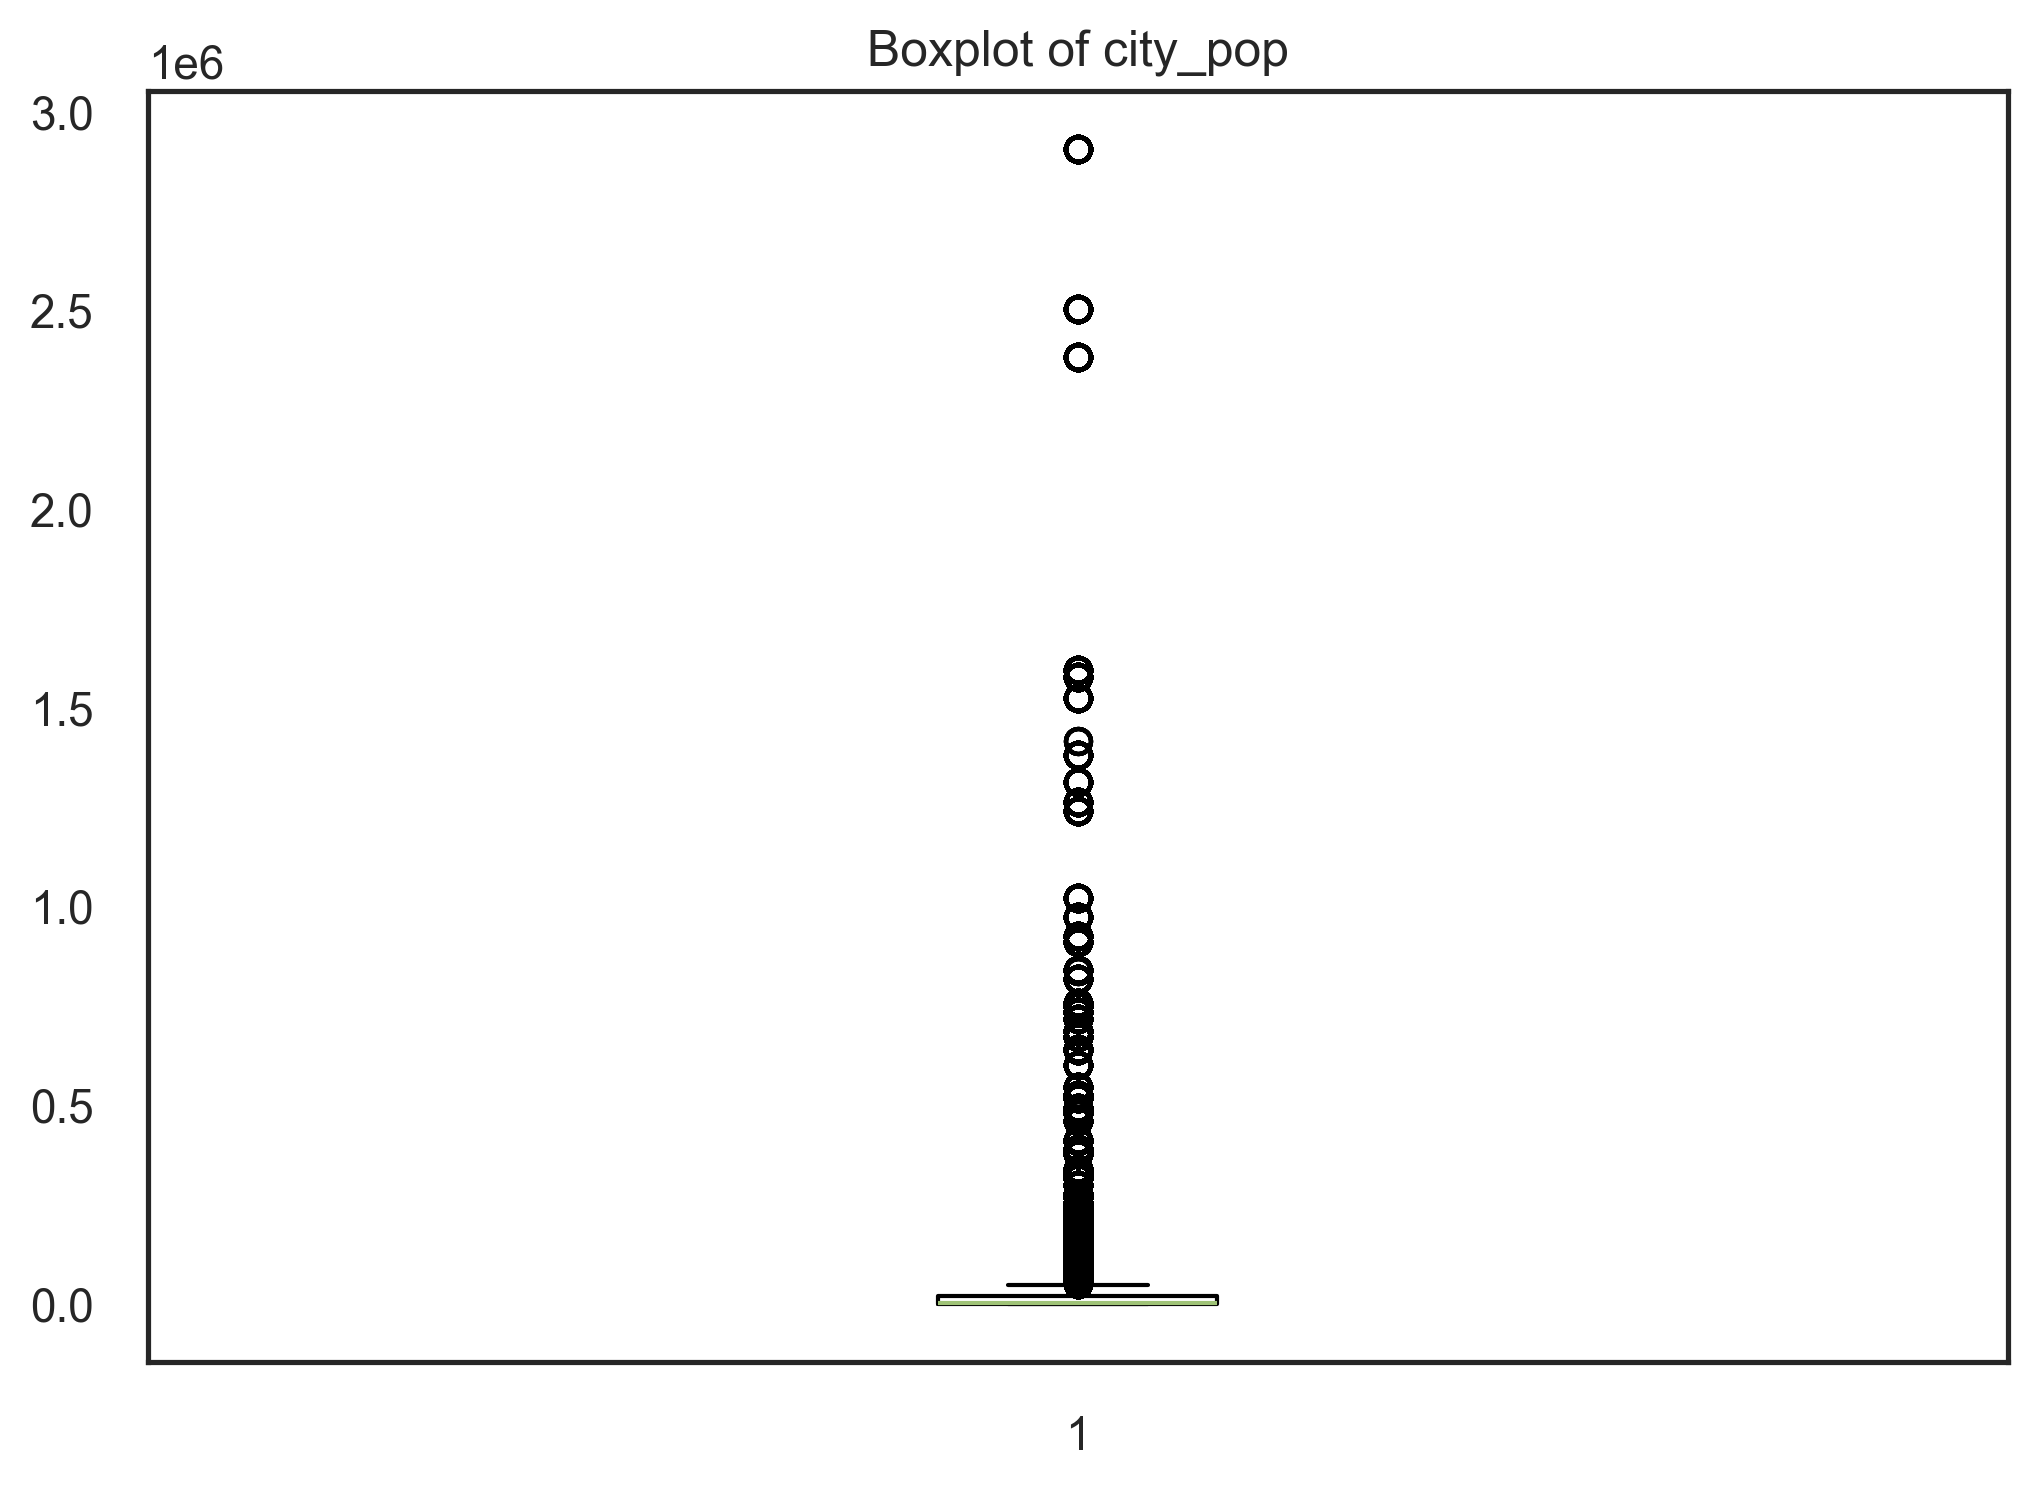

In [46]:
# Further checking distribution of continuous variables - amt, city_pop and age columns to see if there are any valid outliers
plt.figure(figsize=(8, 4))

plt.boxplot(fraud.amt)
plt.title('Boxplot of amt')
plt.show()

plt.boxplot(fraud.city_pop)
plt.title('Boxplot of city_pop')
plt.show()


plt.boxplot(fraud.age)
plt.title('Boxplot of age')
plt.show()

The age column has no outliers while amt and city_pop stastically shows outliers. However, both amount and city population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

In [49]:
# Identifying all the Numeric and non numeric columns
num = []
obj = []
for i in range (0,13):
    if fraud.iloc[:,i].dtype != 'O':
        num.append(i)
    else:
        obj.append(i)
print(num)
print(obj)
col_names = fraud.columns
print(col_names)

[2, 6, 7, 8, 9, 11, 12]
[0, 1, 3, 4, 5, 10]
Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'trans_date', 'trans_time'],
      dtype='object')


In [50]:
# Checking the distribution of object variables
for i in obj:
    print (col_names[i])
    print (fraud.iloc[:,i].value_counts(normalize=True))
    print ('*' * 50)

merchant
merchant
fraud_Kilback LLC                       0.003396
fraud_Cormier LLC                       0.002814
fraud_Schumm PLC                        0.002803
fraud_Kuhn LLC                          0.002707
fraud_Boyer PLC                         0.002694
                                          ...   
fraud_Douglas, DuBuque and McKenzie     0.000598
fraud_Treutel-King                      0.000598
fraud_Medhurst, Labadie and Gottlieb    0.000585
fraud_Reichert-Weissnat                 0.000581
fraud_Hahn, Douglas and Schowalter      0.000561
Name: proportion, Length: 693, dtype: float64
**************************************************
category
category
gas_transport     0.101536
grocery_pos       0.095350
home              0.094947
shopping_pos      0.089978
kids_pets         0.087173
shopping_net      0.075225
entertainment     0.072504
food_dining       0.070535
personal_care     0.069993
health_fitness    0.066230
misc_pos          0.061430
misc_net          0.048807
groc

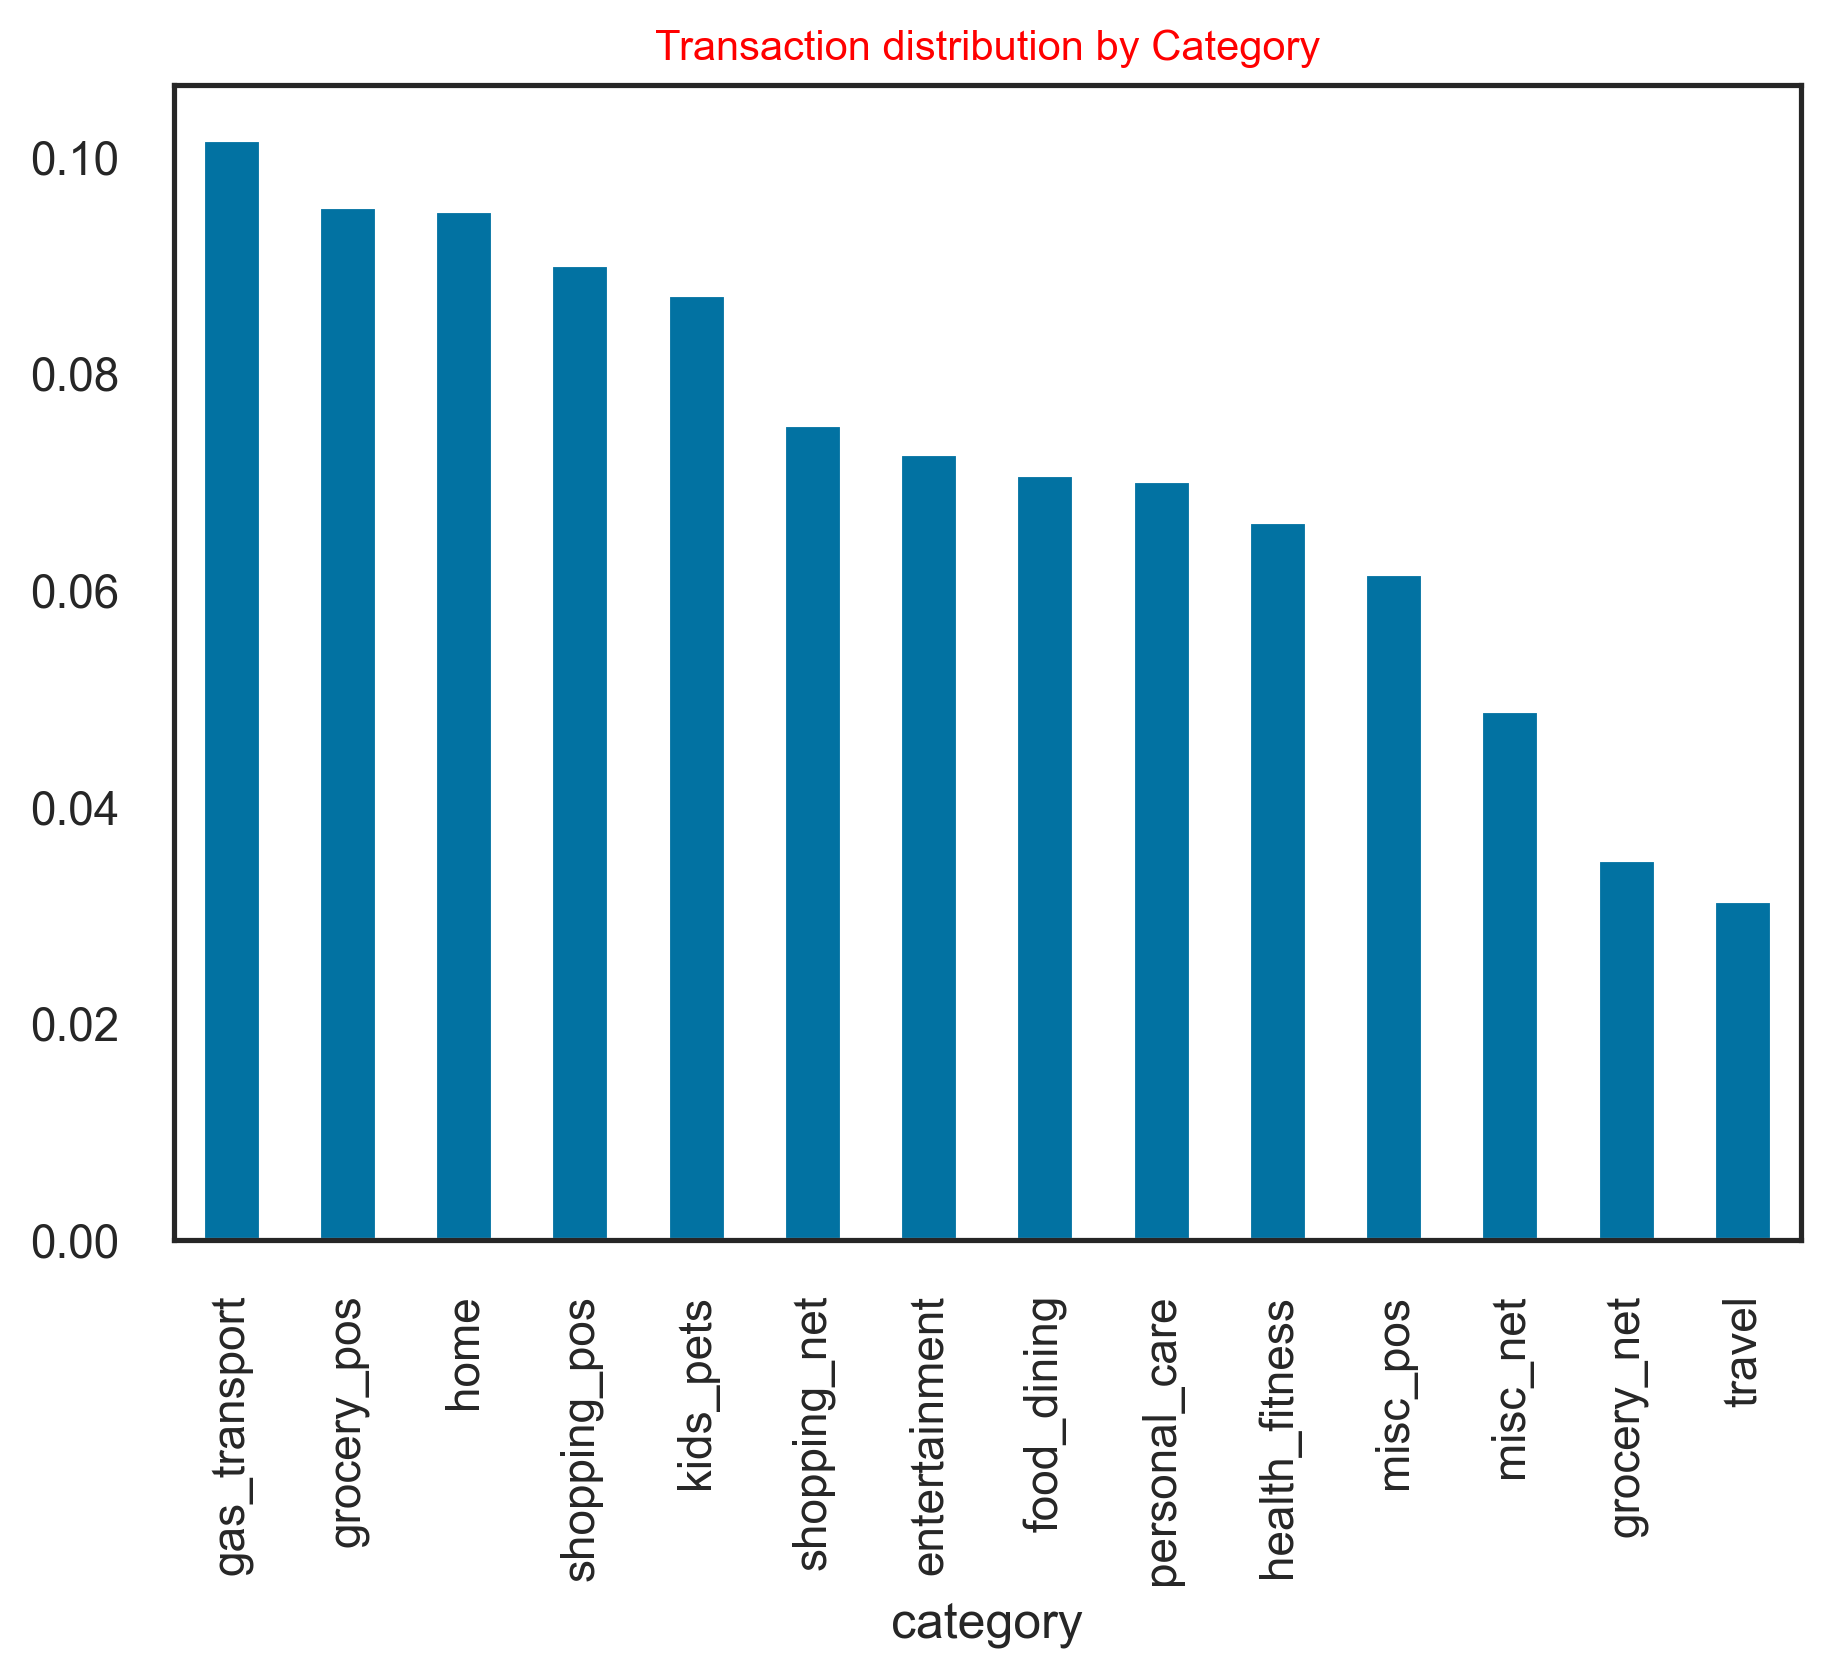

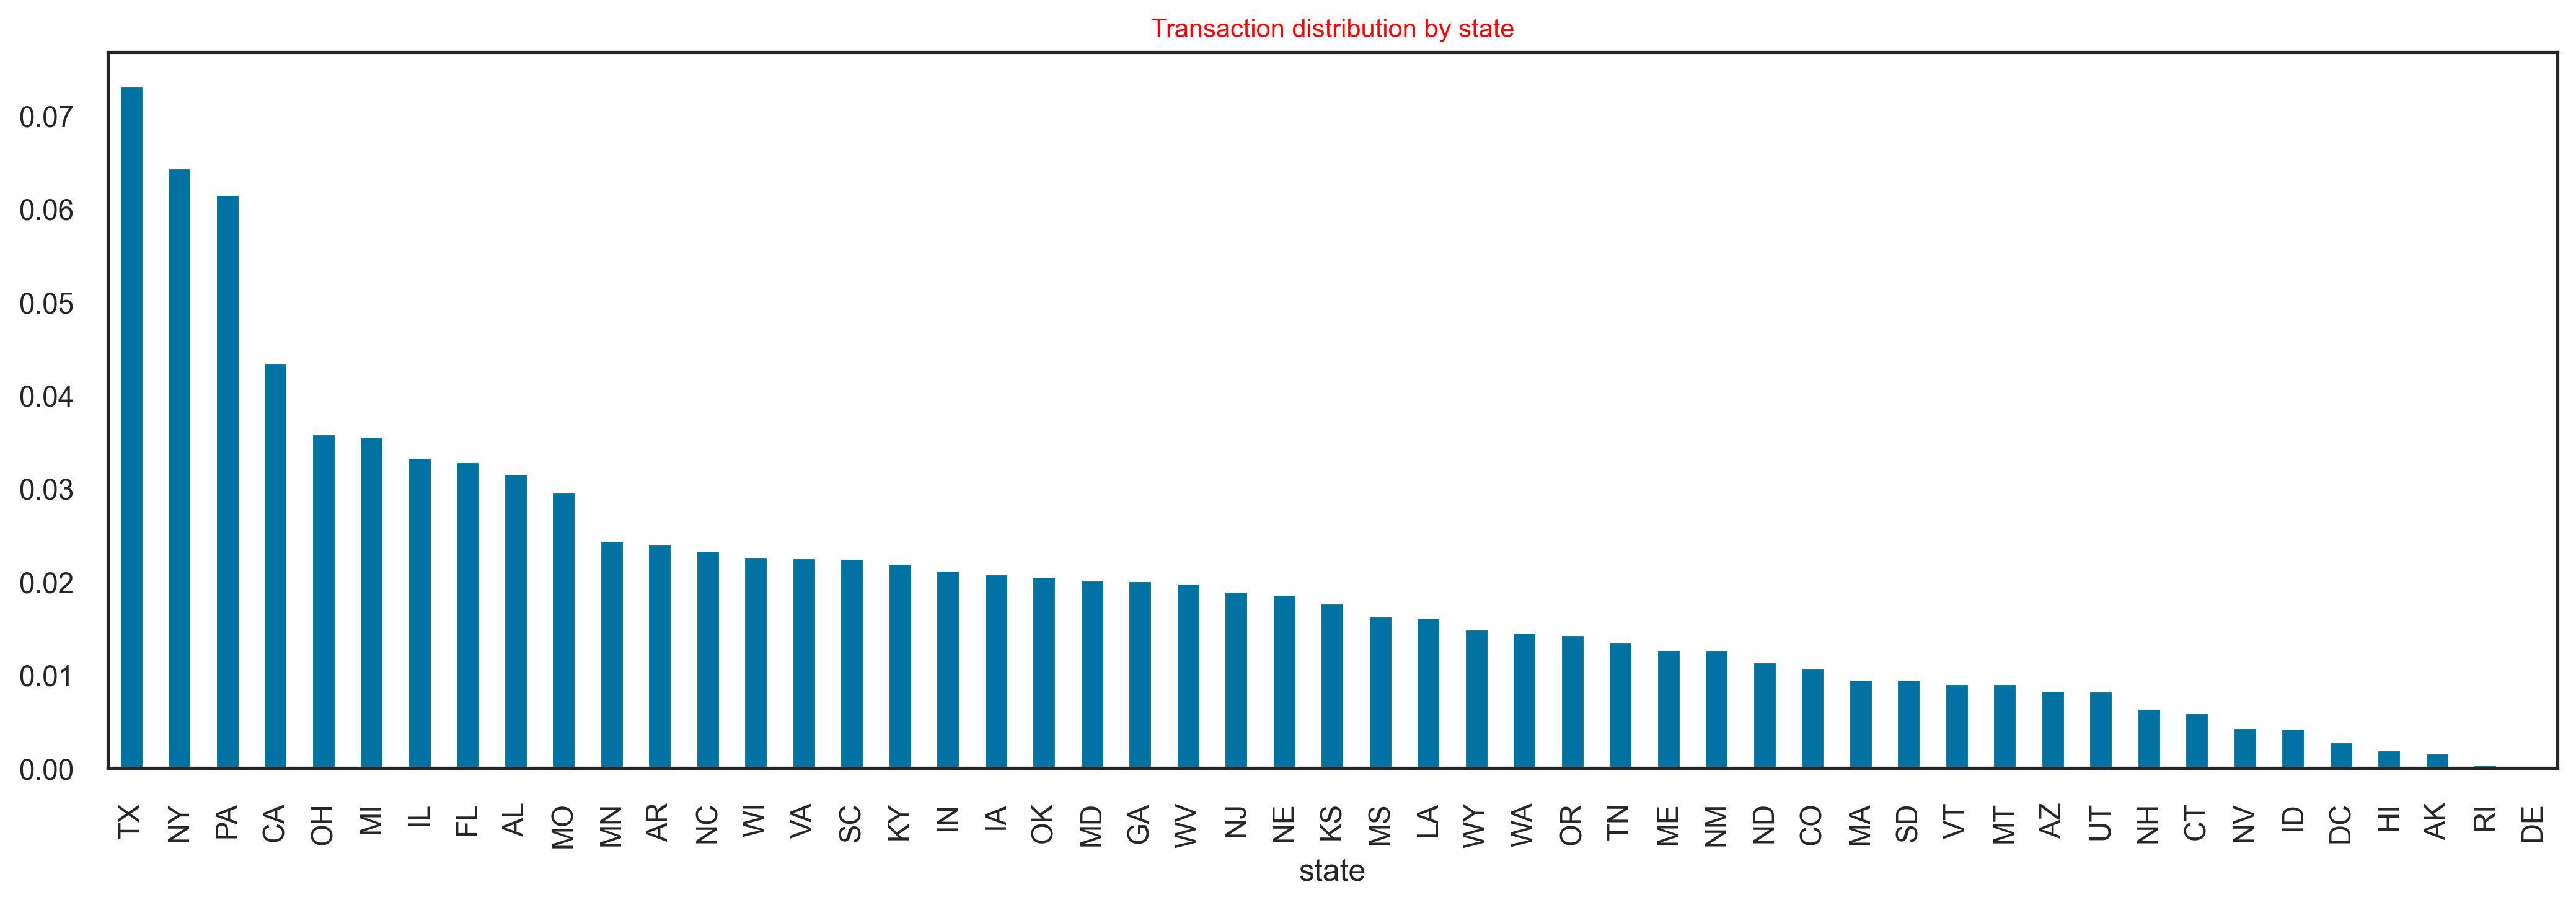

In [51]:
# Lets check the transaction distribution by Category, Gender and State variables
plt.figure(figsize = (7,5))
plt.title('Transaction distribution by Category', fontsize= 10, color = 'Red', fontweight = 100)
fraud.category.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (7,5))
plt.title('Transaction distribution by gender', fontsize= 10, color = 'Red', fontweight = 100)
fraud.gender.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (17,5))
plt.title('Transaction distribution by state', fontsize= 10, color = 'Red', fontweight = 100)
fraud.state.value_counts(normalize=True).plot.bar()
plt.show()

## Bi-Variate Analysis
Check for the behaviour of various columns against the is_fraud column

In [52]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   city        1296675 non-null  object 
 5   state       1296675 non-null  object 
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  object 
 11  unix_time   1296675 non-null  int64  
 12  merch_lat   1296675 non-null  float64
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  int64  
 15  age         1296675 non-null  int64  
 16  trans_date  1296675 non-null  object 
 17  trans_time  1296675 non-null  object 
dtypes: float64(5), int64(5

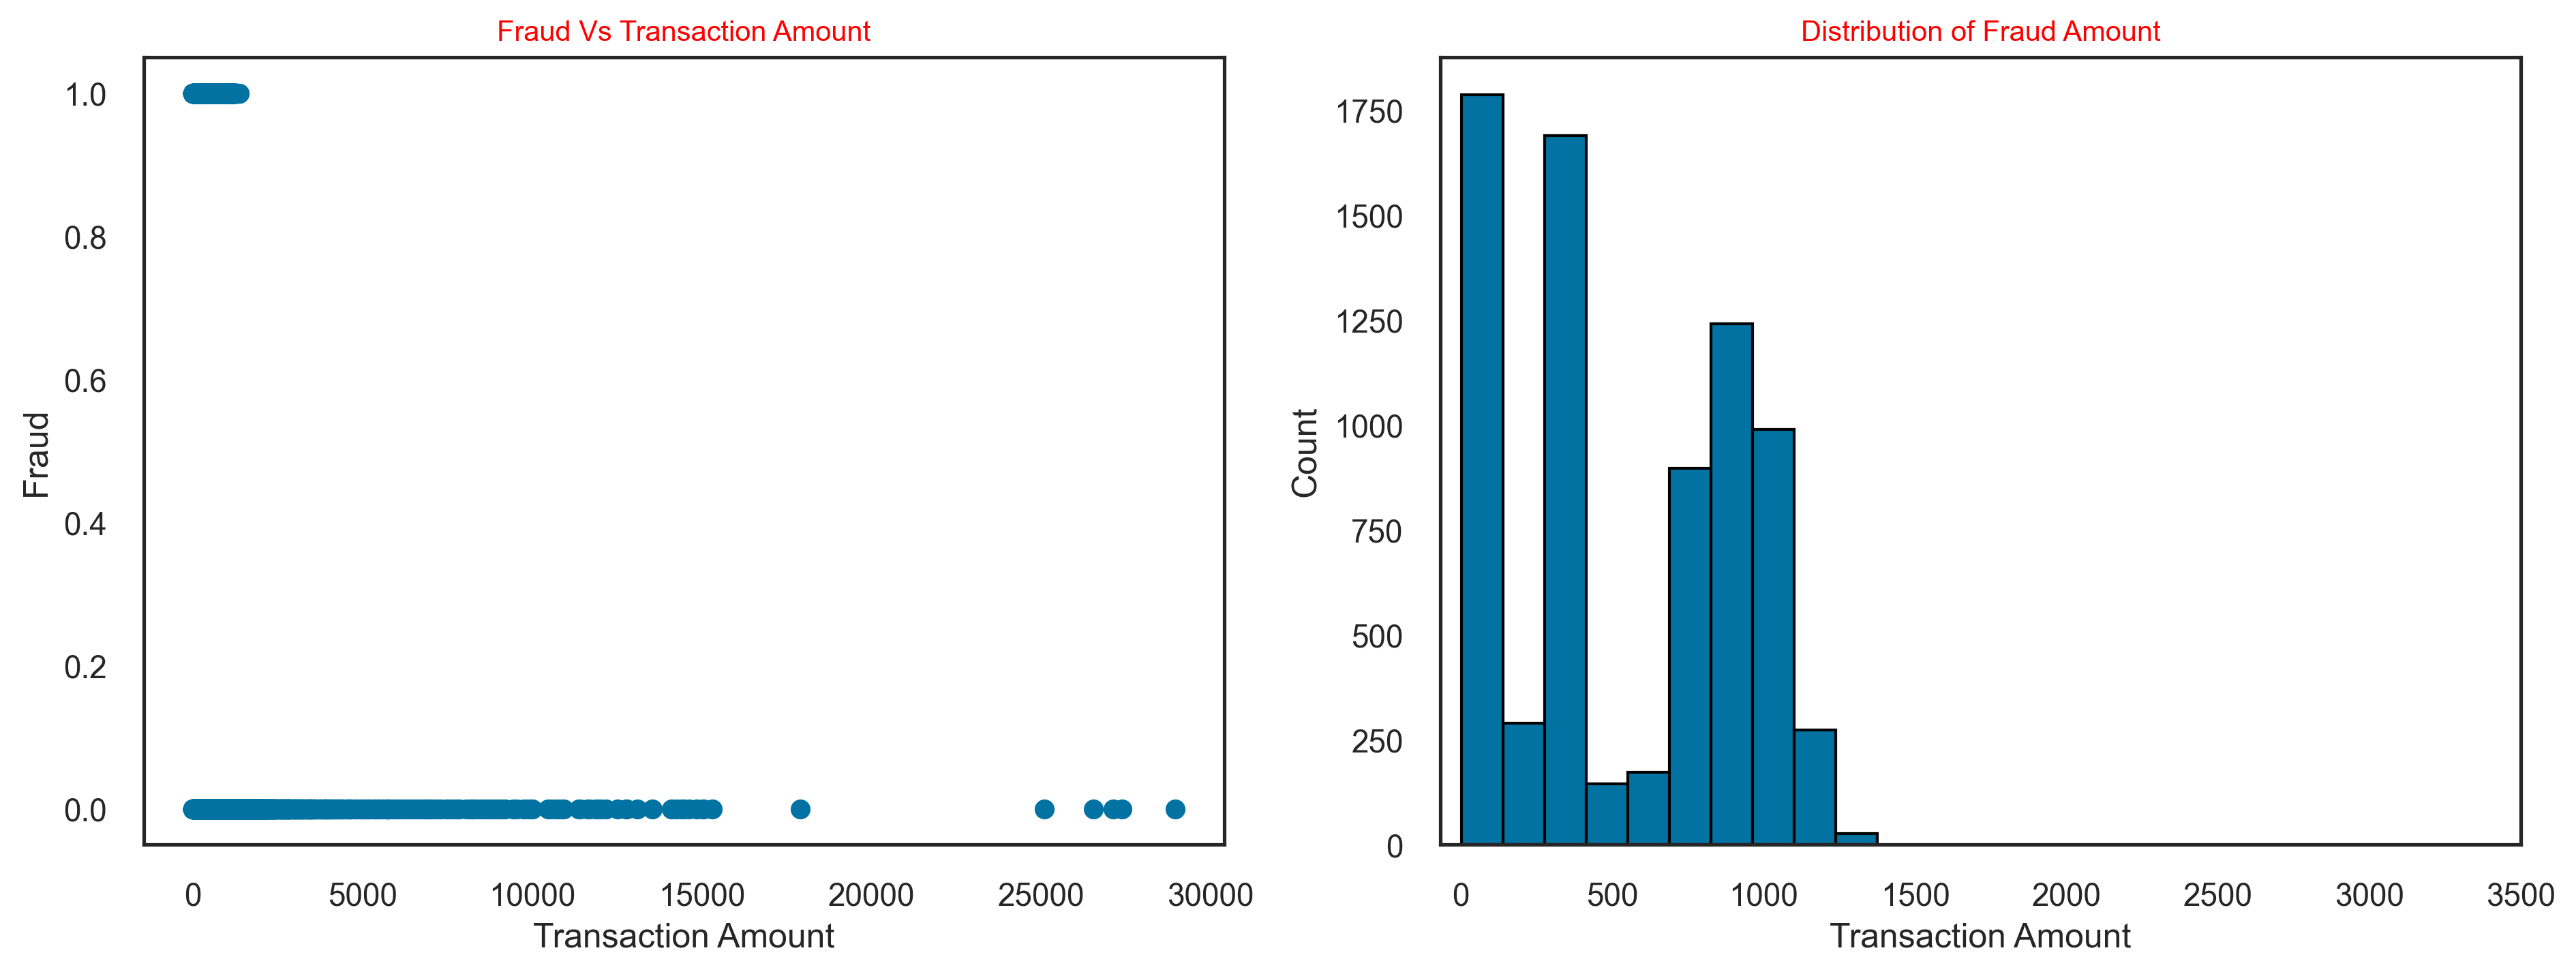

In [57]:
# Fraud Vs Amount
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.xlabel('Transaction Amount')
plt.ylabel('Fraud')
plt.scatter(fraud.amt, fraud.is_fraud)
plt.subplot(1,2,2)
#fraud.groupby('is_fraud')['amt'].mean().plot.bar()
#plt.xticks((0,1),['Not Fraud', 'Fraud'])
#plt.xticks(rotation=0)
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.hist(temp.amt, edgecolor='Black')
plt.xticks(np.arange(0, 4000, step=500))

plt.show()

As can be seen from above, frauds are happening in transactions with lower amount hence indicating there is a relation in them.

In [ ]:
# Fraud transactions Vs merchant
# Total number of transactions per merchant
merch_tran_total = fraud.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

merchant
fraud_Abbott-Rogahn                 1844
fraud_Abbott-Steuber                1763
fraud_Abernathy and Sons            1751
fraud_Abshire PLC                   1895
fraud_Adams, Kovacek and Kuhlman     940
Name: is_fraud, dtype: int64

In [59]:
# Total fraud transactions per merchant
merch_tran_fraud = fraud[fraud.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud.head()

merchant
fraud_Rau and Sons    49
fraud_Kozey-Boehm     48
fraud_Cormier LLC     48
fraud_Doyle Ltd       47
fraud_Kilback LLC     47
Name: count, dtype: int64

In [60]:
# Percent of fraud transactions per merchant
fraud_perc = merch_tran_fraud/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

merchant
fraud_Kozey-Boehm                        2.572347
fraud_Herman, Treutel and Dickens        2.538462
fraud_Kerluke-Abshire                    2.230686
fraud_Brown PLC                          2.210884
fraud_Goyette Inc                        2.161606
                                           ...   
fraud_Ritchie, Bradtke and Stiedemann         NaN
fraud_Romaguera and Sons                      NaN
fraud_Schroeder Group                         NaN
fraud_Schroeder, Wolff and Hermiston          NaN
fraud_Wiegand-Lowe                            NaN
Length: 693, dtype: float64

Baring a few merchants, most of them have equal distribution of transactions and hence this field may play important role in the model. Changing the alphabetic values to numeric as models expects numeric data.

In [61]:
# variable transformation - merchant
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud.merchant = label_encoder.fit_transform(fraud.merchant)
fraud_test.merchant = label_encoder.fit_transform(fraud_test.merchant)

In [62]:
# Fraud transactions Vs City
# Percent distribution of fraud based on city
city_tran_total = fraud.sort_values('city').groupby('city').count()['is_fraud']
city_tran_fraud = fraud[fraud.is_fraud == 1]['city'].value_counts()
fraud_perc = city_tran_fraud/ city_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

city
Nicholson       100.0
Mount Vernon    100.0
Ashland         100.0
Waukau          100.0
North East      100.0
dtype: float64

As can be seen, few cities have all transactions as fraud. All these cities have low transaction rate. There are 58 such cities.

In [63]:
# Transforming alphabetic city data into numeric to be processed by the model
fraud.city = label_encoder.fit_transform(fraud.city)
fraud_test.city = label_encoder.fit_transform(fraud_test.city)

In [64]:
# category Vs fraud
# Percent distribution of fraud based on transaction category
cat_tran_total = fraud.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = fraud[fraud.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()

In [65]:
# Transforming alphabetic category data into numeric to be processed by the model
fraud.category = label_encoder.fit_transform(fraud.category)
fraud_test.category = label_encoder.fit_transform(fraud_test.category)

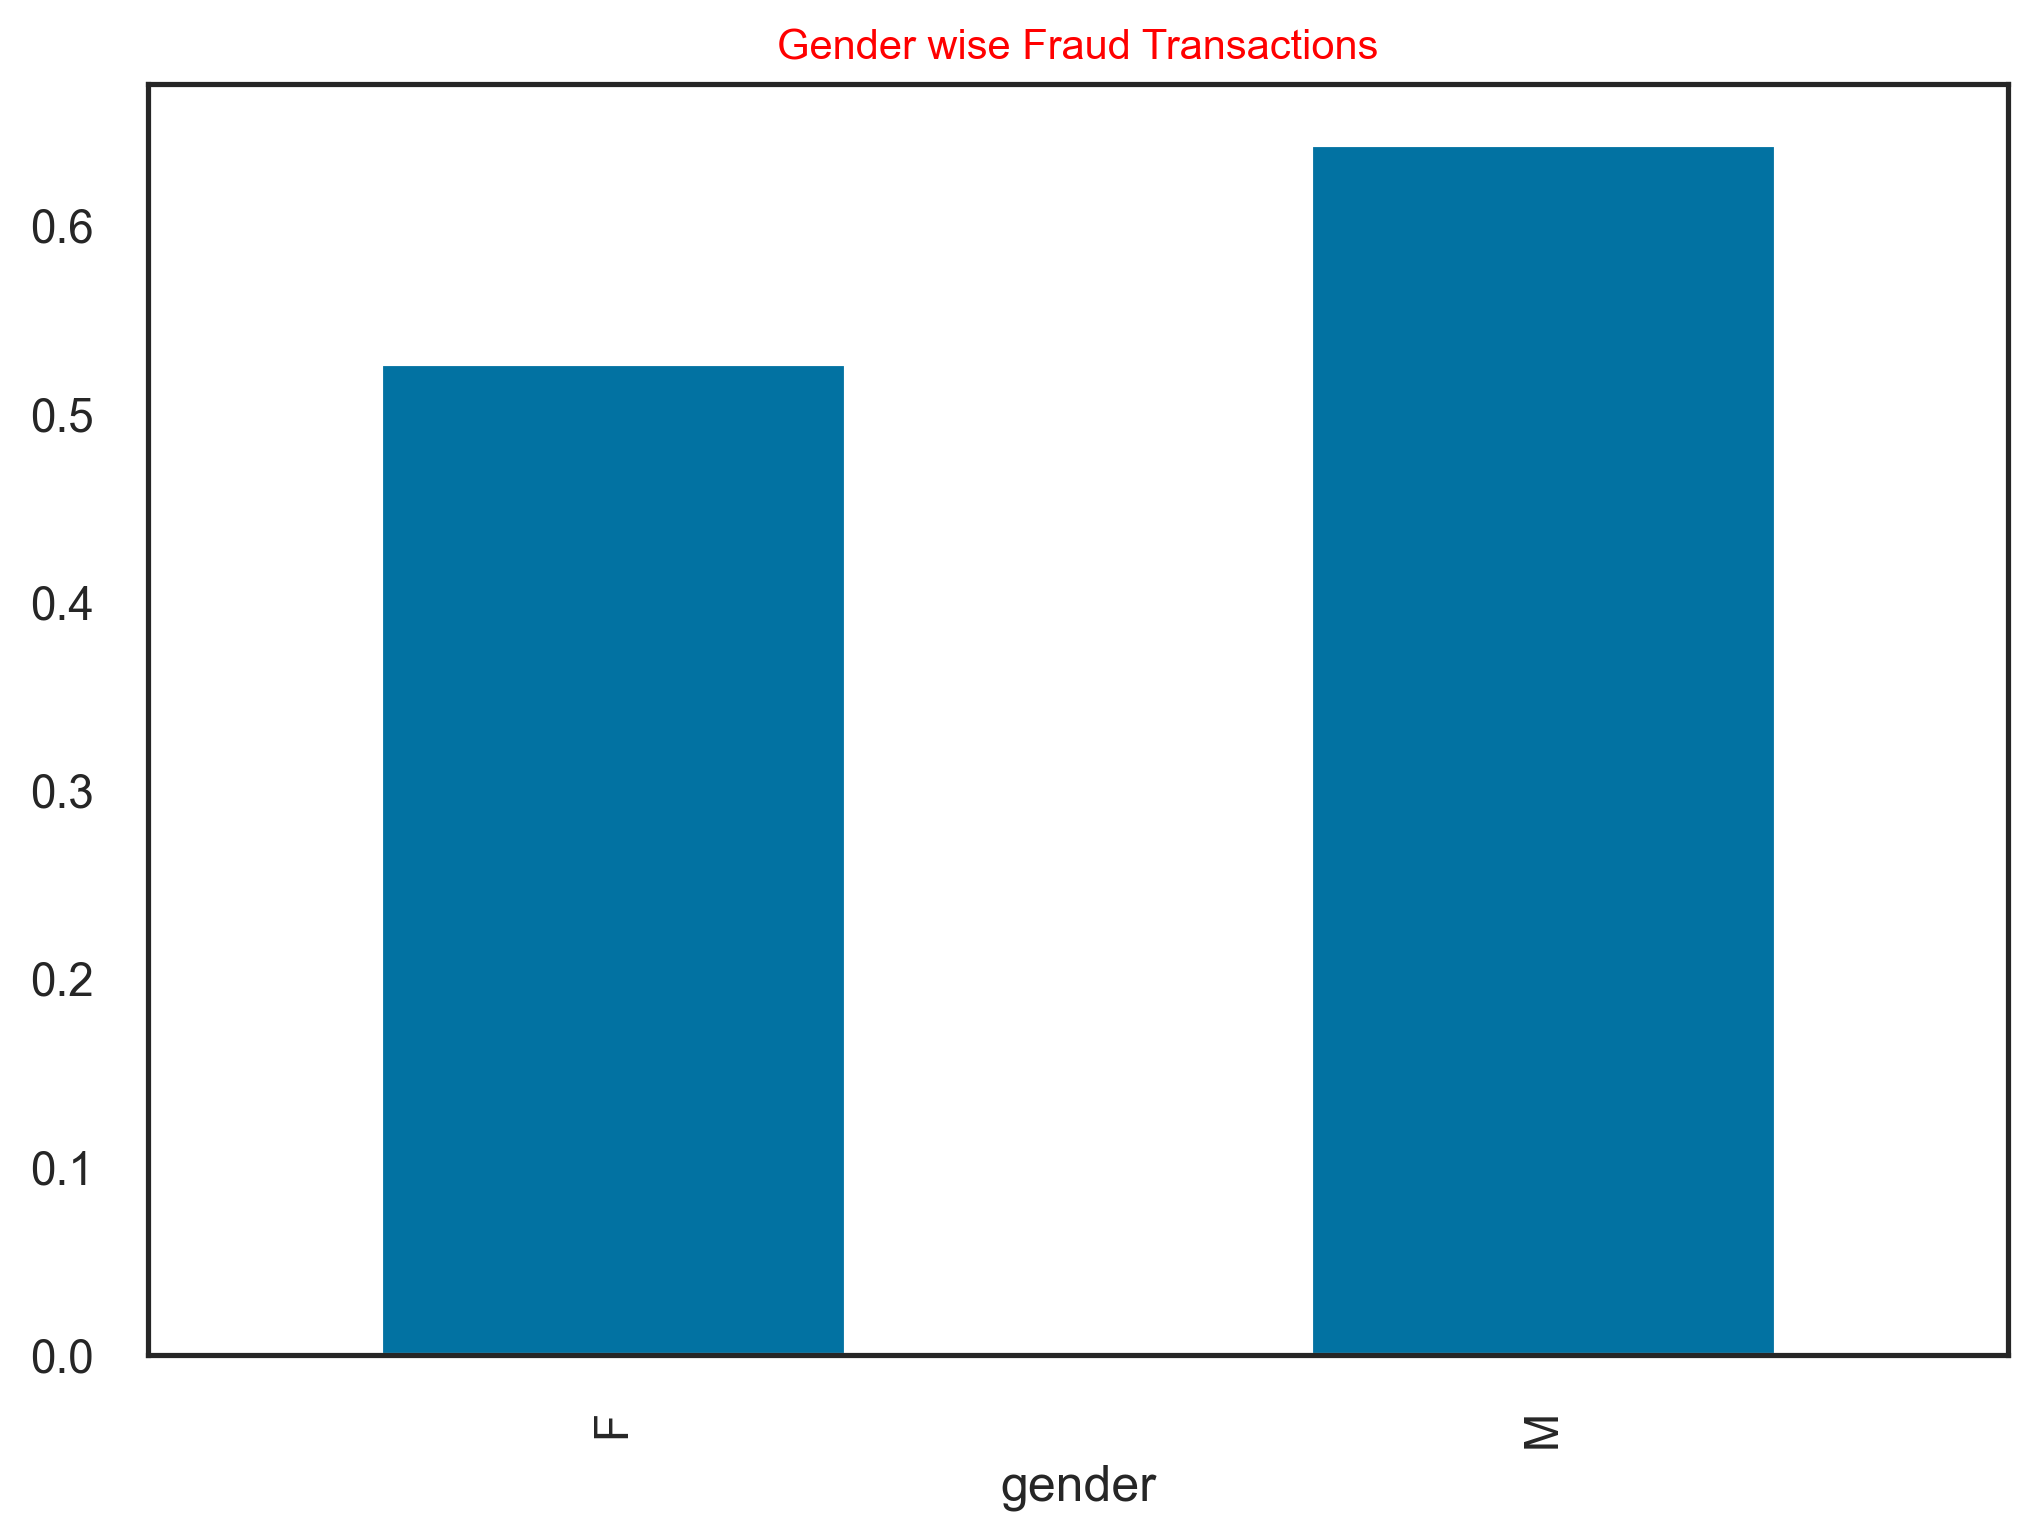

In [66]:
# Gender Vs Fraud
# Percent distribution of fraud based on Gender
gen_tran_total = fraud.sort_values('gender').groupby('gender').count()['is_fraud']
gen_tran_fraud = fraud[fraud.is_fraud == 1]['gender'].value_counts()
fraud_perc = gen_tran_fraud/ gen_tran_total * 100
plt.title('Gender wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
fraud_perc.sort_values().plot.bar()
plt.show()

In [67]:
# Transforming alphabetic gender data into numeric to be processed by the model
fraud.gender = fraud.gender.map({'M': 1, "F": 0})
fraud_test.gender = fraud_test.gender.map({'M': 1, "F": 0})

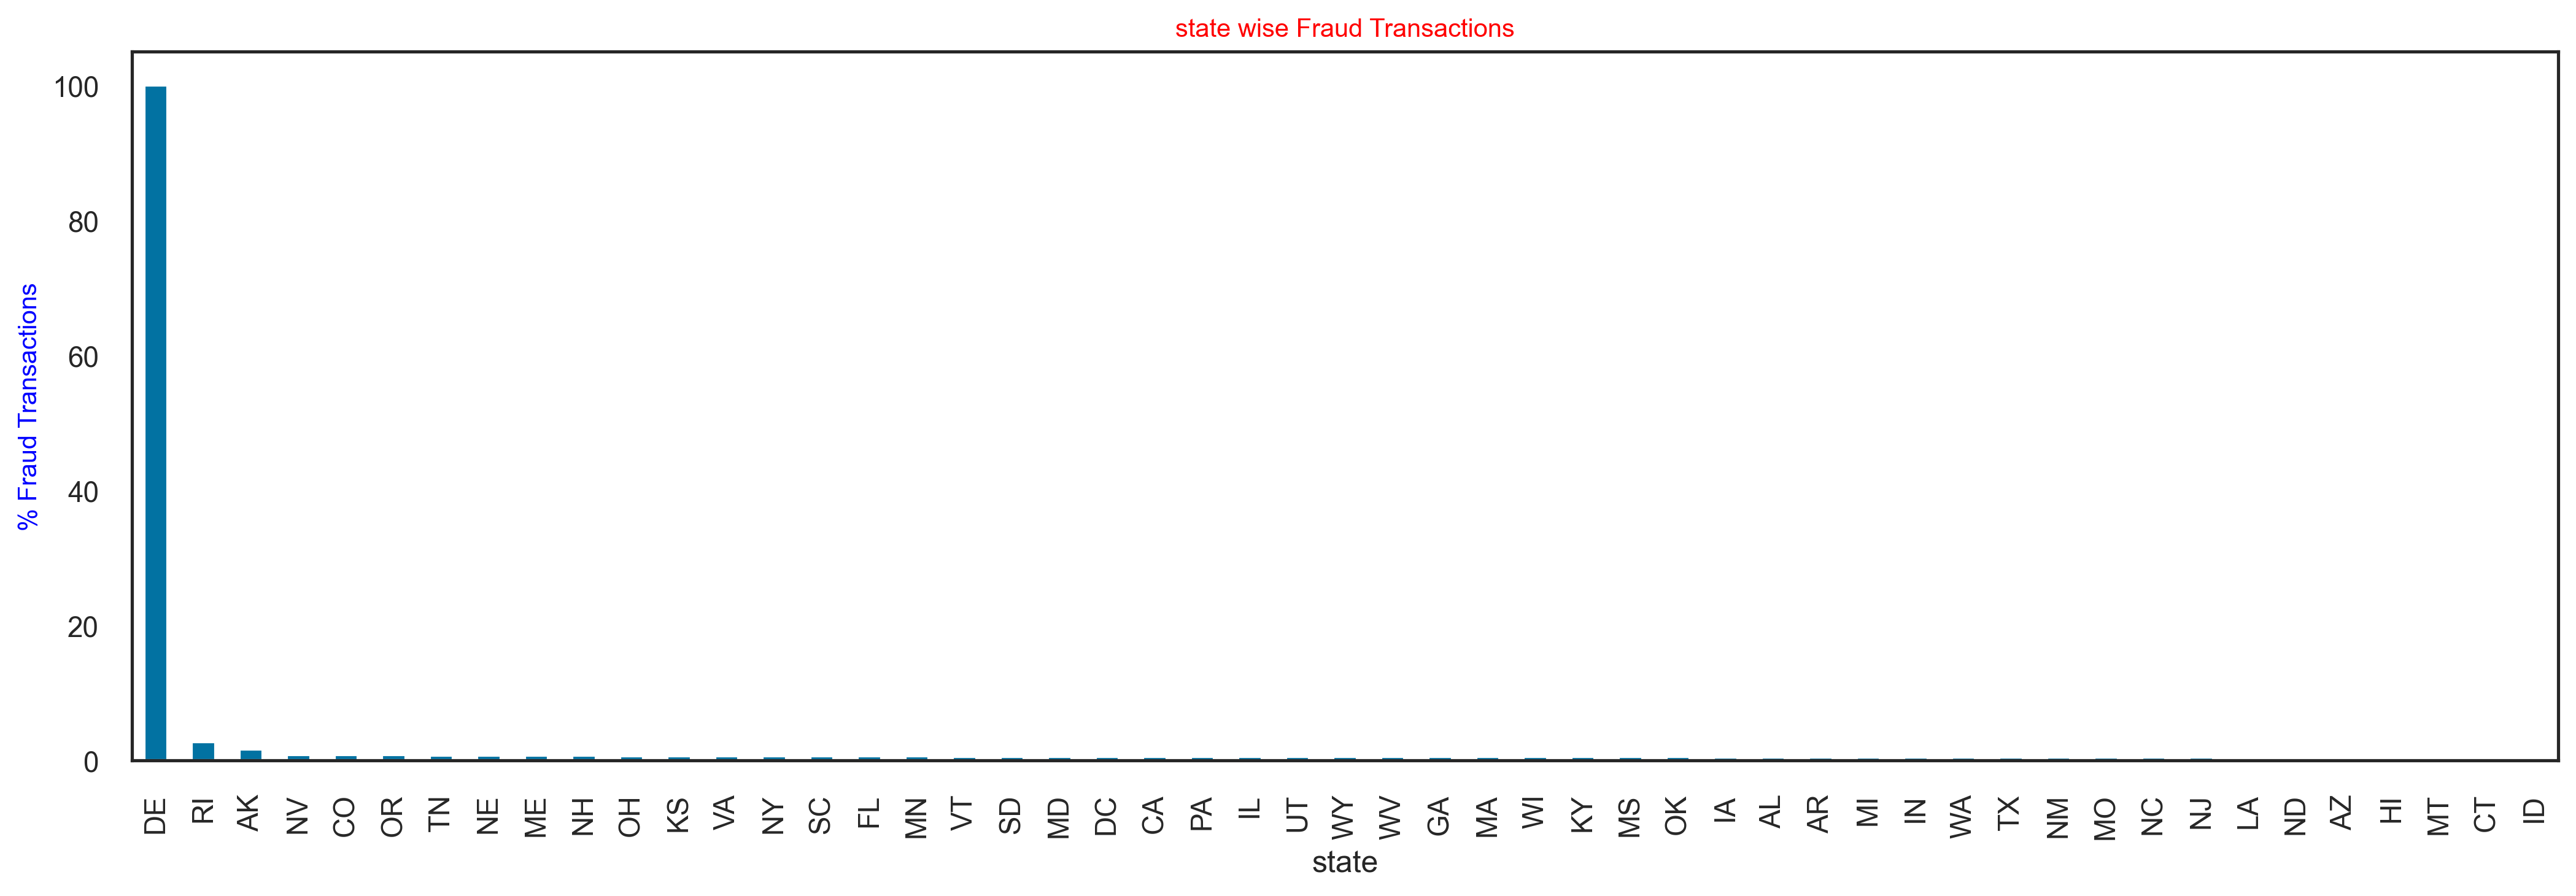

In [68]:
# state Vs fraud
# Percent distribution of fraud based on State
plt.figure(figsize = (17,5))
state_tran_total = fraud.sort_values('state').groupby('state').count()['is_fraud']
state_tran_fraud = fraud[fraud.is_fraud == 1]['state'].value_counts()
fraud_perc = state_tran_fraud/ state_tran_total * 100
plt.title('state wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values(ascending=False).plot.bar()
plt.show()

In [70]:
fraud_perc.sort_values(ascending=False).head()

state
DE    100.000000
RI      2.727273
AK      1.698113
NV      0.838238
CO      0.814121
dtype: float64

This is very significant. While the number of transactions in DE is very less, all of them are fraud transaction. Rest all the states have very low fraud transaction.

In [71]:
# Transforming alphabetic state data into numeric to be processed by the model
fraud.state = label_encoder.fit_transform(fraud.state)
fraud_test.state = label_encoder.fit_transform(fraud_test.state)

In [72]:
# Job Vs Fraud
# Percent distribution of fraud based on Job
job_tran_total = fraud.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = fraud[fraud.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

job
Legal secretary                      100.000000
Broadcast journalist                 100.000000
Personnel officer                    100.000000
Armed forces technical officer       100.000000
Careers adviser                      100.000000
Engineer, site                       100.000000
Warehouse manager                    100.000000
Veterinary surgeon                   100.000000
Accountant, chartered                100.000000
Dancer                               100.000000
Homeopath                            100.000000
Information officer                  100.000000
Industrial buyer                     100.000000
Solicitor                            100.000000
Ship broker                          100.000000
Air traffic controller               100.000000
Sales promotion account executive    100.000000
Contracting civil engineer           100.000000
Forest/woodland manager              100.000000
Lawyer                                 5.185185
dtype: float64

There seems certain jobs that have real high % of fraud transactions.

In [73]:
# Transforming alphabetic job data into numeric to be processed by the model
fraud.job = label_encoder.fit_transform(fraud.job)
fraud_test.job = label_encoder.fit_transform(fraud_test.job)

In [74]:
# Fraud Vs City Population
plt.figure(figsize=[15,6])
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of City Population on Fraud Transaction', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.city_pop, edgecolor='Black')
plt.xticks(np.arange(10000, 3000000, step=300000))
plt.show()

Cities with less population, tends to have more fraud cases.

In [75]:
# Fraud Vs Unix Time
plt.title('Fraud Vs unix_time', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.unix_time, fraud.is_fraud)
plt.show()

In [76]:
# Fraud Vs Age
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

So, people in age group 50 to 60 tends to be slightly more victims of fraud.

In [77]:
# Fraud Vs Zip
zip_tran_total = fraud.sort_values('zip').groupby('zip').count()['is_fraud']
zip_tran_fraud = fraud[fraud.is_fraud == 1]['zip'].value_counts()
fraud_perc = zip_tran_fraud/ zip_tran_total * 100
fraud_perc.sort_values(ascending=False).head(25)

zip
99747    100.0
93427    100.0
94508    100.0
95688    100.0
85201    100.0
10018    100.0
89109    100.0
90240    100.0
74108    100.0
11747    100.0
76048    100.0
75246    100.0
80019    100.0
77038    100.0
11944    100.0
11763    100.0
77027    100.0
78644    100.0
78208    100.0
46060    100.0
48436    100.0
46510    100.0
48054    100.0
16428    100.0
55040    100.0
dtype: float64

As is evident from above stats, there are perticular ZIP codes that have 100% frauds.

In [80]:
# Fraud Vs lat
lat_tran_total = fraud.sort_values('lat').groupby('lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

lat
45.4682    100.0
27.8942    100.0
45.3304    100.0
29.8868    100.0
29.7396    100.0
dtype: float64

As is evident from above stats, there are perticular latitudes codes that have 100% frauds.

In [81]:
# Fraud Vs long
long_tran_total = fraud.sort_values('long').groupby('long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

long
-122.3022    100.0
-122.4477    100.0
-121.9887    100.0
-72.3674     100.0
-73.8597     100.0
dtype: float64

In [84]:
# Fraud Vs merch_lat
lat_tran_total = fraud.sort_values('merch_lat').groupby('merch_lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['merch_lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

merch_lat
65.941742    100.0
65.902132    100.0
65.710538    100.0
65.692310    100.0
65.654142    100.0
dtype: float64

In [85]:
# Fraud Vs merch_long
long_tran_total = fraud.sort_values('merch_long').groupby('merch_long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['merch_long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

merch_long
-67.569238    100.0
-69.026481    100.0
-69.058194    100.0
-69.087141    100.0
-69.102103    100.0
dtype: float64

1. There are multiple demographies - Zip, City, States, Latitudes, Longitudes and Job types that have only Fraud transactions.
2. Even though they have 100% frauds, the number of transactions is very low. For Example State DE had only 9 transactions in 2 years. Hence, it is very less likely to impact the model.

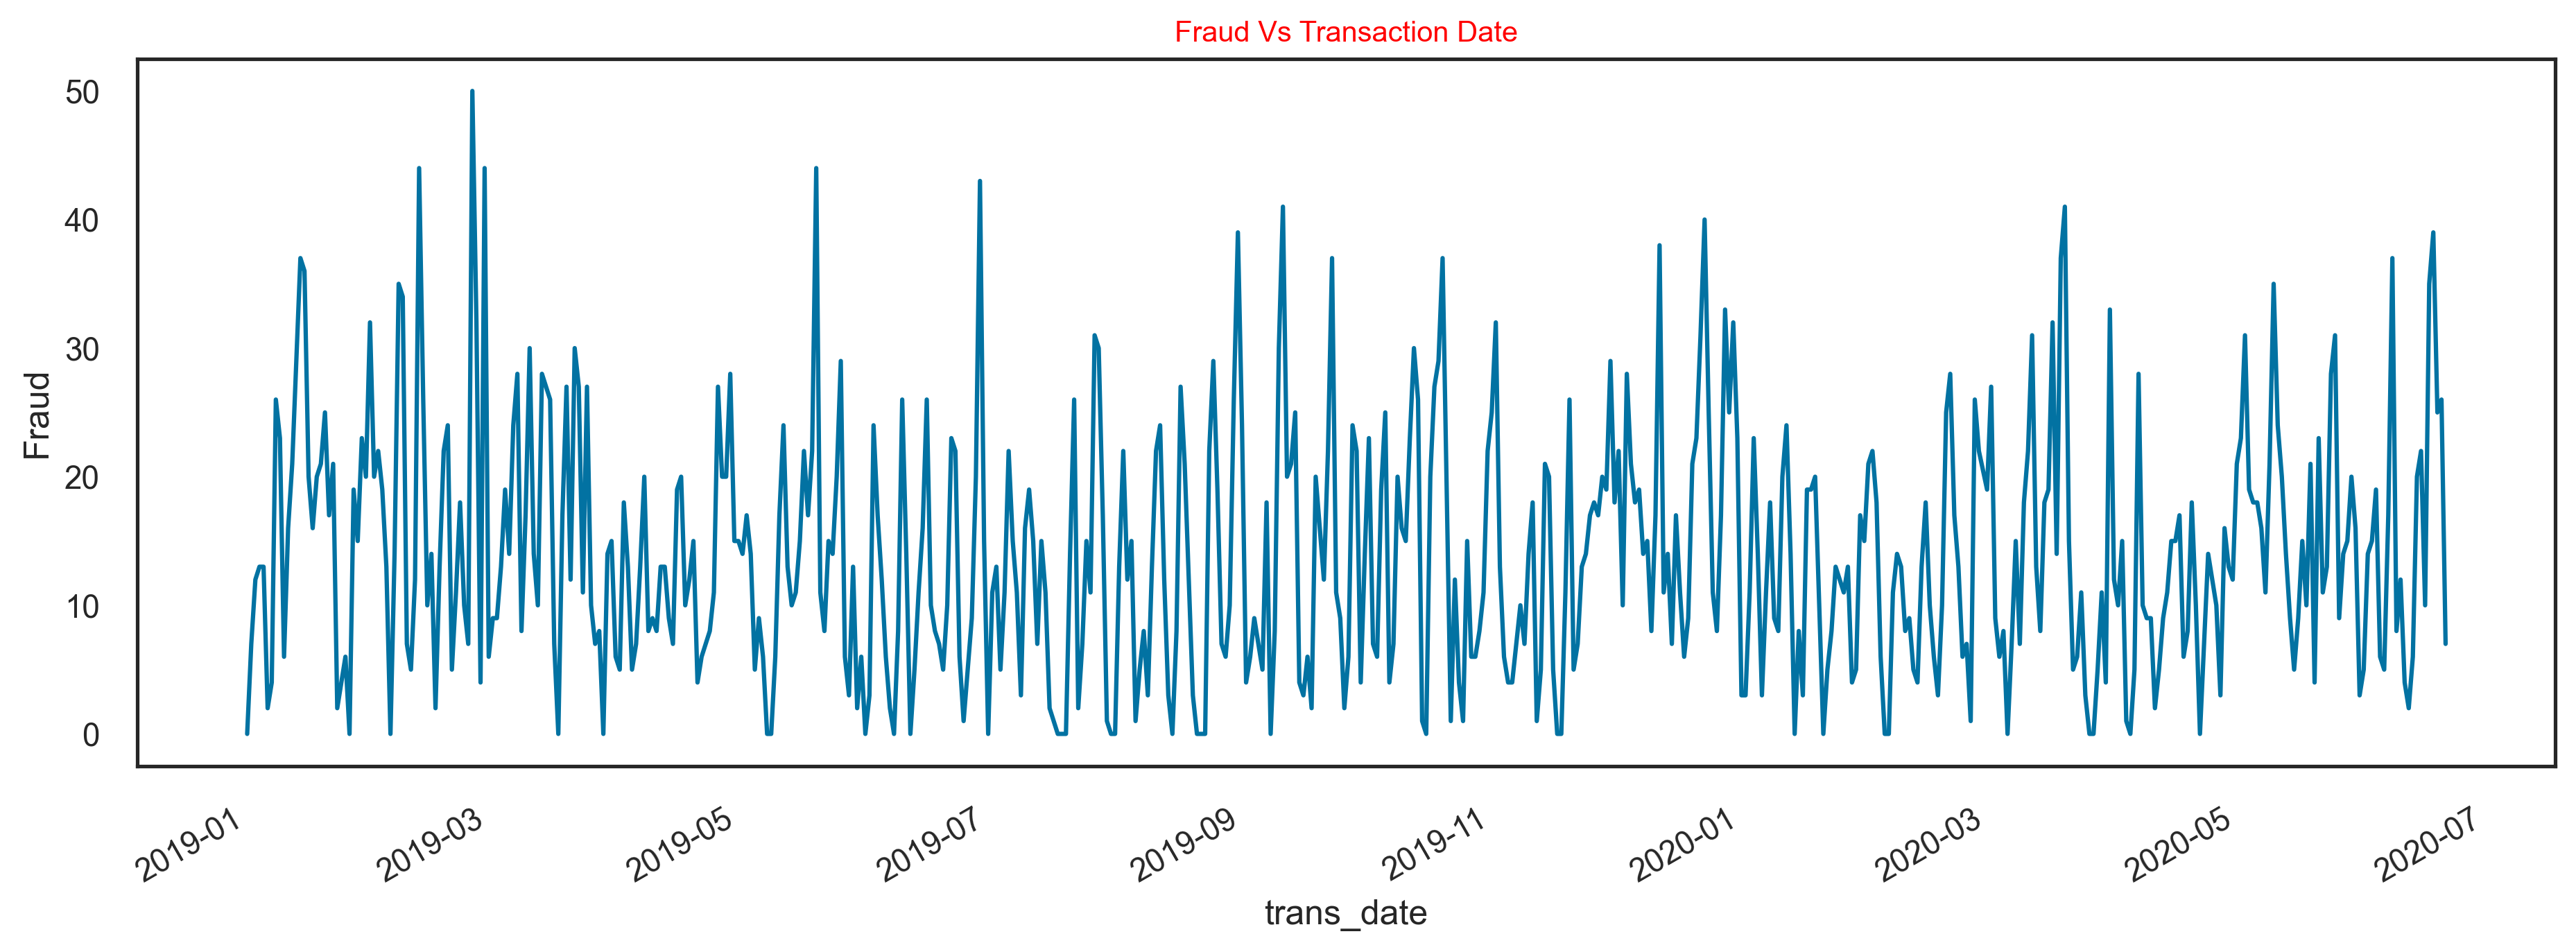

In [93]:
# Fraud Vs trans_date
fraud['trans_date'] =  pd.to_datetime(fraud['trans_date'])
plt.figure(figsize=[15,5])
plt.title('Fraud Vs Transaction Date', fontsize= 10, color = 'Red', fontweight = 100)
plt.xlabel('Transaction Date')
plt.ylabel('Fraud')
fraud.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

Now its time to change date and time to a format more acceptable for modelling. Before that, lets pull some stats required for Cost sheet. Also, it may be noticed that the train data is for 1.5 years (full 2019 till mid of 2020) and test data is for last 6 months of 2020. This way we will be able to build model on 1.5 year of data and test it on future data and hence check model performance in future. We will do the Cost Benifit analysis on the entire data.

In [94]:
# Total number of months
date_fraud = fraud.trans_date
date_fraud_test = pd.to_datetime(fraud_test.trans_date)
date_fraud = date_fraud.dt.to_period('M')
date_fraud_test = date_fraud_test.dt.to_period('M')
date = pd.concat([date_fraud, date_fraud_test])
print ('total number of records in file: ', date.size)

total number of records in file:  1852394


In [95]:
print ('Total number of months: ', date.value_counts().size)

Total number of months:  24


In [96]:
print ('Average transactions per month: ', round(date.size/date.value_counts().size,0) )

Average transactions per month:  77183.0


In [97]:
# Extracting fraud data
temp1 = fraud[['amt', 'is_fraud']]
temp2 = fraud_test[['amt', 'is_fraud']]
temp = pd.concat([temp1, temp2])
temp.shape

(1852394, 2)

In [99]:
# Average frauds per month
fraud_temp = temp[temp.is_fraud == 1]
print ('Average fraud transactions per month: ', round(fraud_temp.shape[0]/ date.value_counts().size,0))

Average fraud transactions per month:  402.0


In [100]:
# Average amount per fraud transaction
print ('Average amount per fraud transaction: ', round(sum(fraud_temp.amt)/ fraud_temp.shape[0], 2))

Average amount per fraud transaction:  530.66


In [101]:
# Average amount per fraud transaction
print ('max fraud amount : ' , max(fraud_temp.amt))

max fraud amount :  1376.04


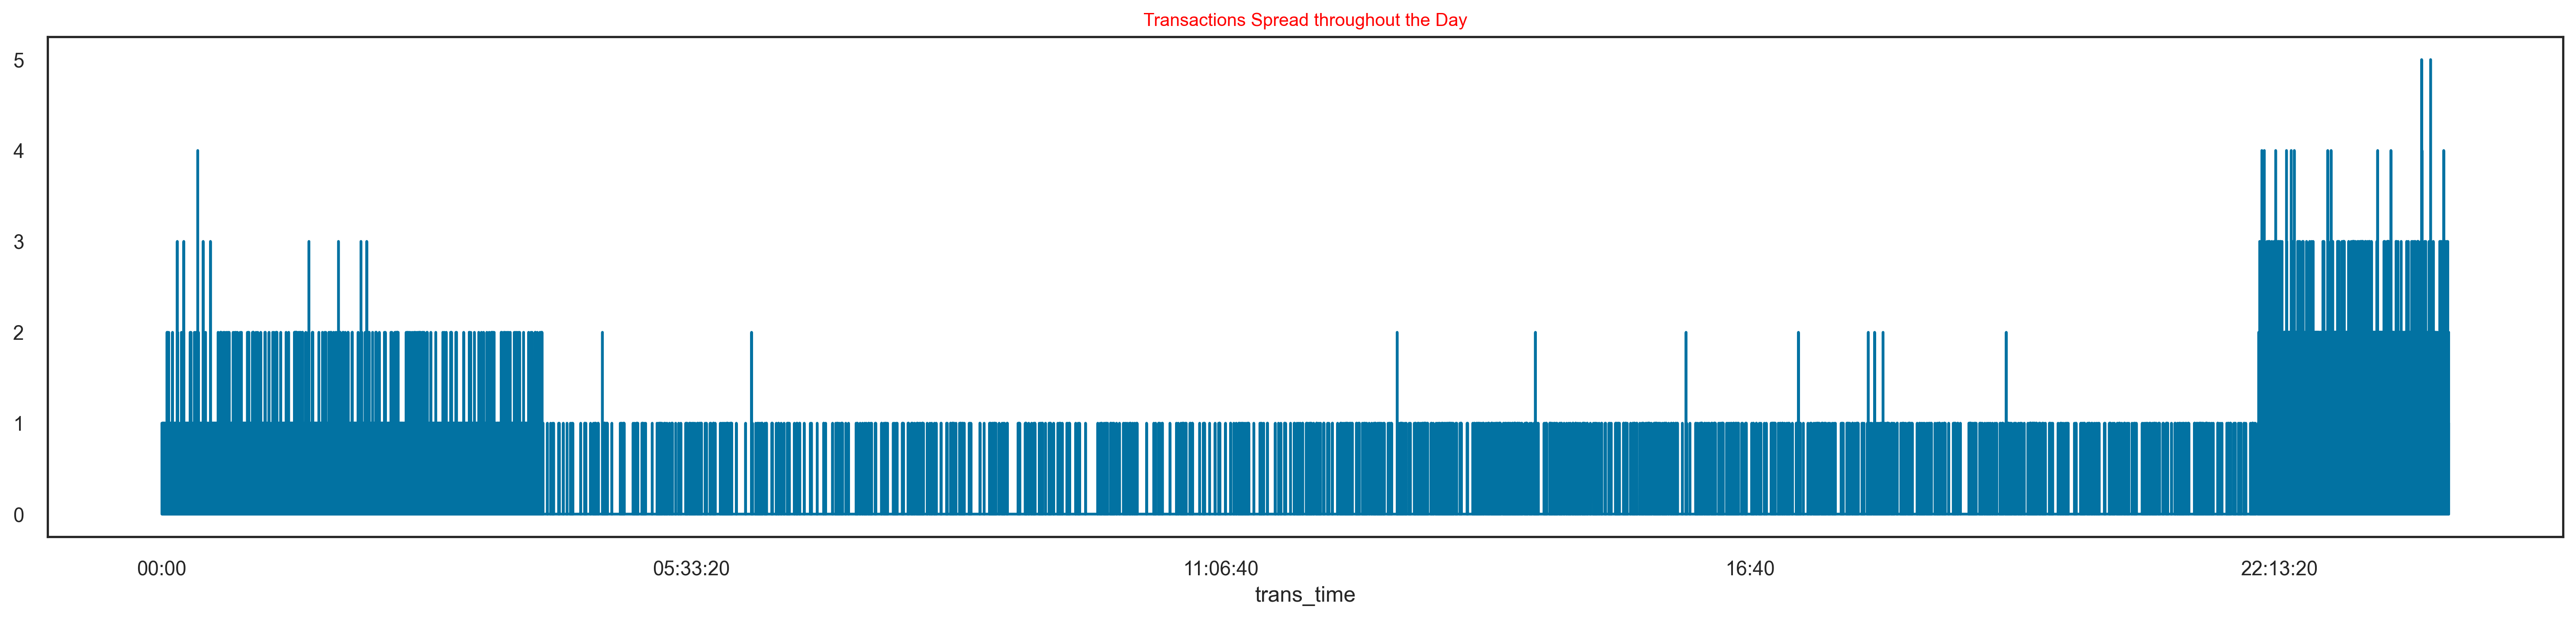

In [102]:
# Fraud Vs trans_time
import datetime as dt
fraud.trans_date = fraud.trans_date.map(dt.datetime.toordinal)
plt.figure(figsize=[25,5])
plt.title('Transactions Spread throughout the Day', fontsize= 10, color = 'Red', fontweight = 100)
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

So, late nights and early mornings are the most prone time for frauds. Highest frequency of frauds is between 10 pm to 12 am. 12 am to 4:00 am also shows very high frequency of fraud transactions.

In [103]:
# Converting trans_time into seconds & ploting the above graph again
fraud.trans_time = pd.to_datetime(fraud.trans_time,format='%H:%M:%S')
fraud.trans_time = 3600 * pd.DatetimeIndex(fraud.trans_time).hour + 60 * pd.DatetimeIndex(fraud.trans_time).minute + pd.DatetimeIndex(fraud.trans_time).second
plt.figure(figsize=[25,5])
plt.xticks(np.arange(0,90000,5000))
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

In [104]:
# Similar data-time changes in test dataset
fraud_test['trans_date'] =  pd.to_datetime(fraud_test['trans_date'])
fraud_test.trans_date = fraud_test.trans_date.map(dt.datetime.toordinal)
fraud_test.trans_time = pd.to_datetime(fraud_test.trans_time,format='%H:%M:%S')
fraud_test.trans_time = 3600 * pd.DatetimeIndex(fraud_test.trans_time).hour + 60 * pd.DatetimeIndex(fraud_test.trans_time).minute + pd.DatetimeIndex(fraud_test.trans_time).second

In [105]:
print ('train : ', fraud.shape)
print ('test : ', fraud_test.shape)

train :  (1296675, 18)
test :  (555719, 18)


In [106]:
fraud

merchant  category     amt  gender  city  state    zip      lat  \
0             514         8    4.97       0   526     27  28654  36.0788   
1             241         4  107.23       0   612     47  99160  48.8878   
2             390         0  220.11       1   468     13  83252  42.1808   
3             360         2   45.00       1    84     26  59632  46.2306   
4             297         9   41.96       1   216     45  24433  38.4207   
...           ...       ...     ...     ...   ...    ...    ...      ...   
1296670       499         0   15.56       1   330     44  84735  37.7175   
1296671         2         1   51.70       1   813     20  21790  39.2667   
1296672       599         1  105.93       1   346     32  88325  32.9396   
1296673       509         1   74.90       1   471     41  57756  43.3526   
1296674       370         1    4.30       1   782     26  59871  45.8433   

             long  city_pop  job   unix_time  merch_lat  merch_long  is_fraud  \
0        -81.1781      3495  370  1325376018  36.011293  -82.048315         0   
1       -118.2105       149  428  1325376044  49.159047 -118.186462         0   
2       -112.2620      4154  307  1325376051  43.150704 -112.154481         0   
3       -112.1138      1939  328  1325376076  47.034331 -112.561071         0   
4        -79.4629        99  116  1325376186  38.674999  -78.632459         0   
...           ...       ...  ...         ...        ...         ...       ...   
1296670 -112.4777       258  215  1371816728  36.841266 -111.690765         0   
1296671  -77.5101       100  360  1371816739  38.906881  -78.246528         0   
1296672 -105.8189       899  308  1371816752  33.619513 -105.130529         0   
1296673 -102.5411      1126  485  1371816816  42.788940 -103.241160         0   
1296674 -113.8748       218  467  1371816817  46.565983 -114.186110         0   

         age  trans_date  trans_time  
0         37      737060          18  
1         46      737060          44  
2         63      737060          51  
3         58      737060          76  
4         39      737060         186  
...      ...         ...         ...  
1296670   63      737597       43928  
1296671   45      737597       43939  
1296672   57      737597       43952  
1296673   44      737597       44016  
1296674   29      737597       44017  

[1296675 rows x 18 columns]

In [107]:
corr = fraud.corr()
corr.style.background_gradient(cmap='coolwarm')

# Model Building

In [108]:
fraud

merchant  category     amt  gender  city  state    zip      lat  \
0             514         8    4.97       0   526     27  28654  36.0788   
1             241         4  107.23       0   612     47  99160  48.8878   
2             390         0  220.11       1   468     13  83252  42.1808   
3             360         2   45.00       1    84     26  59632  46.2306   
4             297         9   41.96       1   216     45  24433  38.4207   
...           ...       ...     ...     ...   ...    ...    ...      ...   
1296670       499         0   15.56       1   330     44  84735  37.7175   
1296671         2         1   51.70       1   813     20  21790  39.2667   
1296672       599         1  105.93       1   346     32  88325  32.9396   
1296673       509         1   74.90       1   471     41  57756  43.3526   
1296674       370         1    4.30       1   782     26  59871  45.8433   

             long  city_pop  job   unix_time  merch_lat  merch_long  is_fraud  \
0        -81.1781      3495  370  1325376018  36.011293  -82.048315         0   
1       -118.2105       149  428  1325376044  49.159047 -118.186462         0   
2       -112.2620      4154  307  1325376051  43.150704 -112.154481         0   
3       -112.1138      1939  328  1325376076  47.034331 -112.561071         0   
4        -79.4629        99  116  1325376186  38.674999  -78.632459         0   
...           ...       ...  ...         ...        ...         ...       ...   
1296670 -112.4777       258  215  1371816728  36.841266 -111.690765         0   
1296671  -77.5101       100  360  1371816739  38.906881  -78.246528         0   
1296672 -105.8189       899  308  1371816752  33.619513 -105.130529         0   
1296673 -102.5411      1126  485  1371816816  42.788940 -103.241160         0   
1296674 -113.8748       218  467  1371816817  46.565983 -114.186110         0   

         age  trans_date  trans_time  
0         37      737060          18  
1         46      737060          44  
2         63      737060          51  
3         58      737060          76  
4         39      737060         186  
...      ...         ...         ...  
1296670   63      737597       43928  
1296671   45      737597       43939  
1296672   57      737597       43952  
1296673   44      737597       44016  
1296674   29      737597       44017  

[1296675 rows x 18 columns]

In [109]:
# features = ['hour_of_day', 'category', 'amt', 'merchant', 'job']

features = ['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
        'age', 'trans_date', 'trans_time']

#
# X = df_train[features].set_index("transaction_id")
X = fraud[features]
y = fraud['is_fraud']

print('X shape:{}\ny shape:{}'.format(X.shape,y.shape))

X shape:(1296675, 17)
y shape:(1296675,)


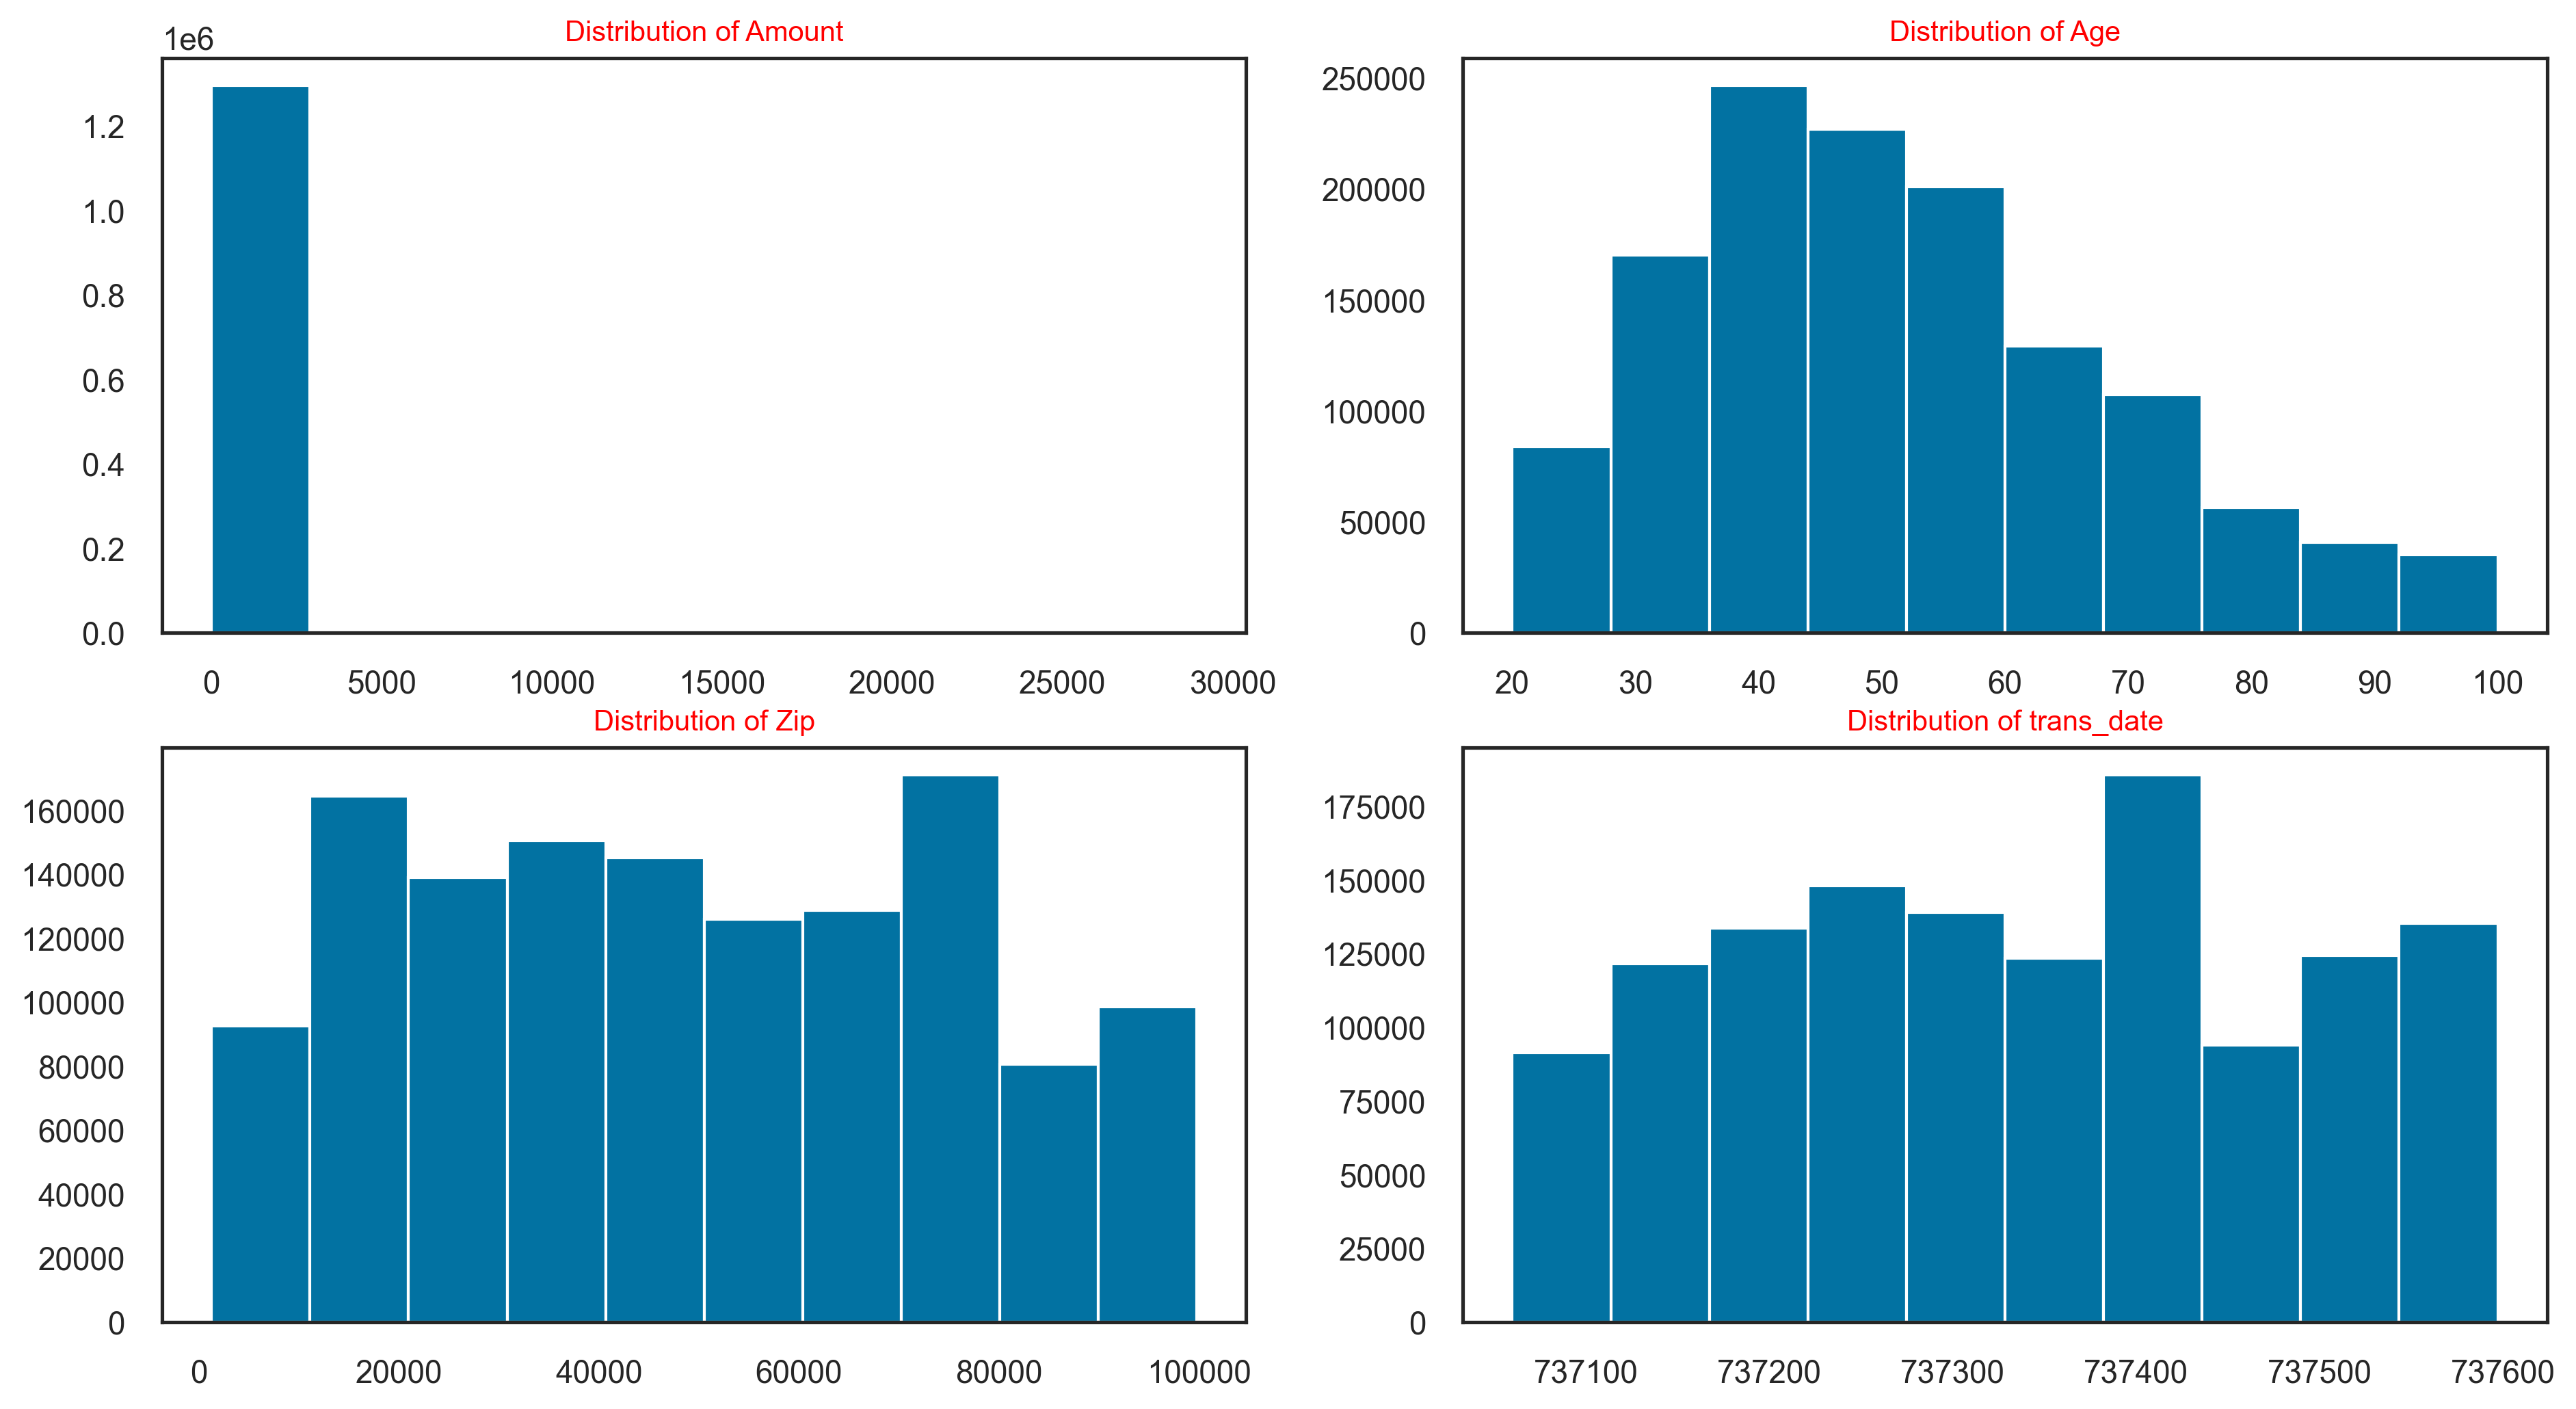

In [110]:
# Check distribution of few variables
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.trans_date)
plt.show()

In [111]:
# Lets try various scalers available in Scikit library. At optimum time, will finalize one.
# Based on various test results, QuantileTransformer with Gaussian distribution seems best suited.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = PowerTransformer()
scaler = QuantileTransformer(output_distribution='normal')
#scaler = RobustScaler()

In [112]:
# Scaling
X = scaler.fit_transform(X)

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# enc = OrdinalEncoder(dtype=np.int64)
# enc.fit(X.loc[:,['category','merchant','job']])

# X.loc[:, ['category','merchant','job']] = enc.transform(X[['category','merchant','job']])

In [ ]:
#X[['category','merchant','job']]

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# def select_features(X_train, y_train, X_test):
#     fs = SelectKBest(score_func=chi2, k='all')
#     fs.fit(X_train, y_train)
#     X_train_fs = fs.transform(X_train)
#     X_test_fs = fs.transform(X_test)
#     return X_train_fs, X_test_fs, fs

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print('X_train shape:{}\ny_train shape:{}'.format(X_train.shape,y_train.shape))
print('X_test shape:{}\ny_test shape:{}'.format(X_test.shape,y_test.shape))

X_train shape:(1037340, 17)
y_train shape:(1037340,)
X_test shape:(259335, 17)
y_test shape:(259335,)


In [114]:
from sklearn.tree import DecisionTreeClassifier

dcstree = DecisionTreeClassifier(random_state=42)
dcstree.fit(X_train, y_train)

y_pred = dcstree.predict(X_test)

[[257548    286]
 [   260   1241]]


<Axes: >

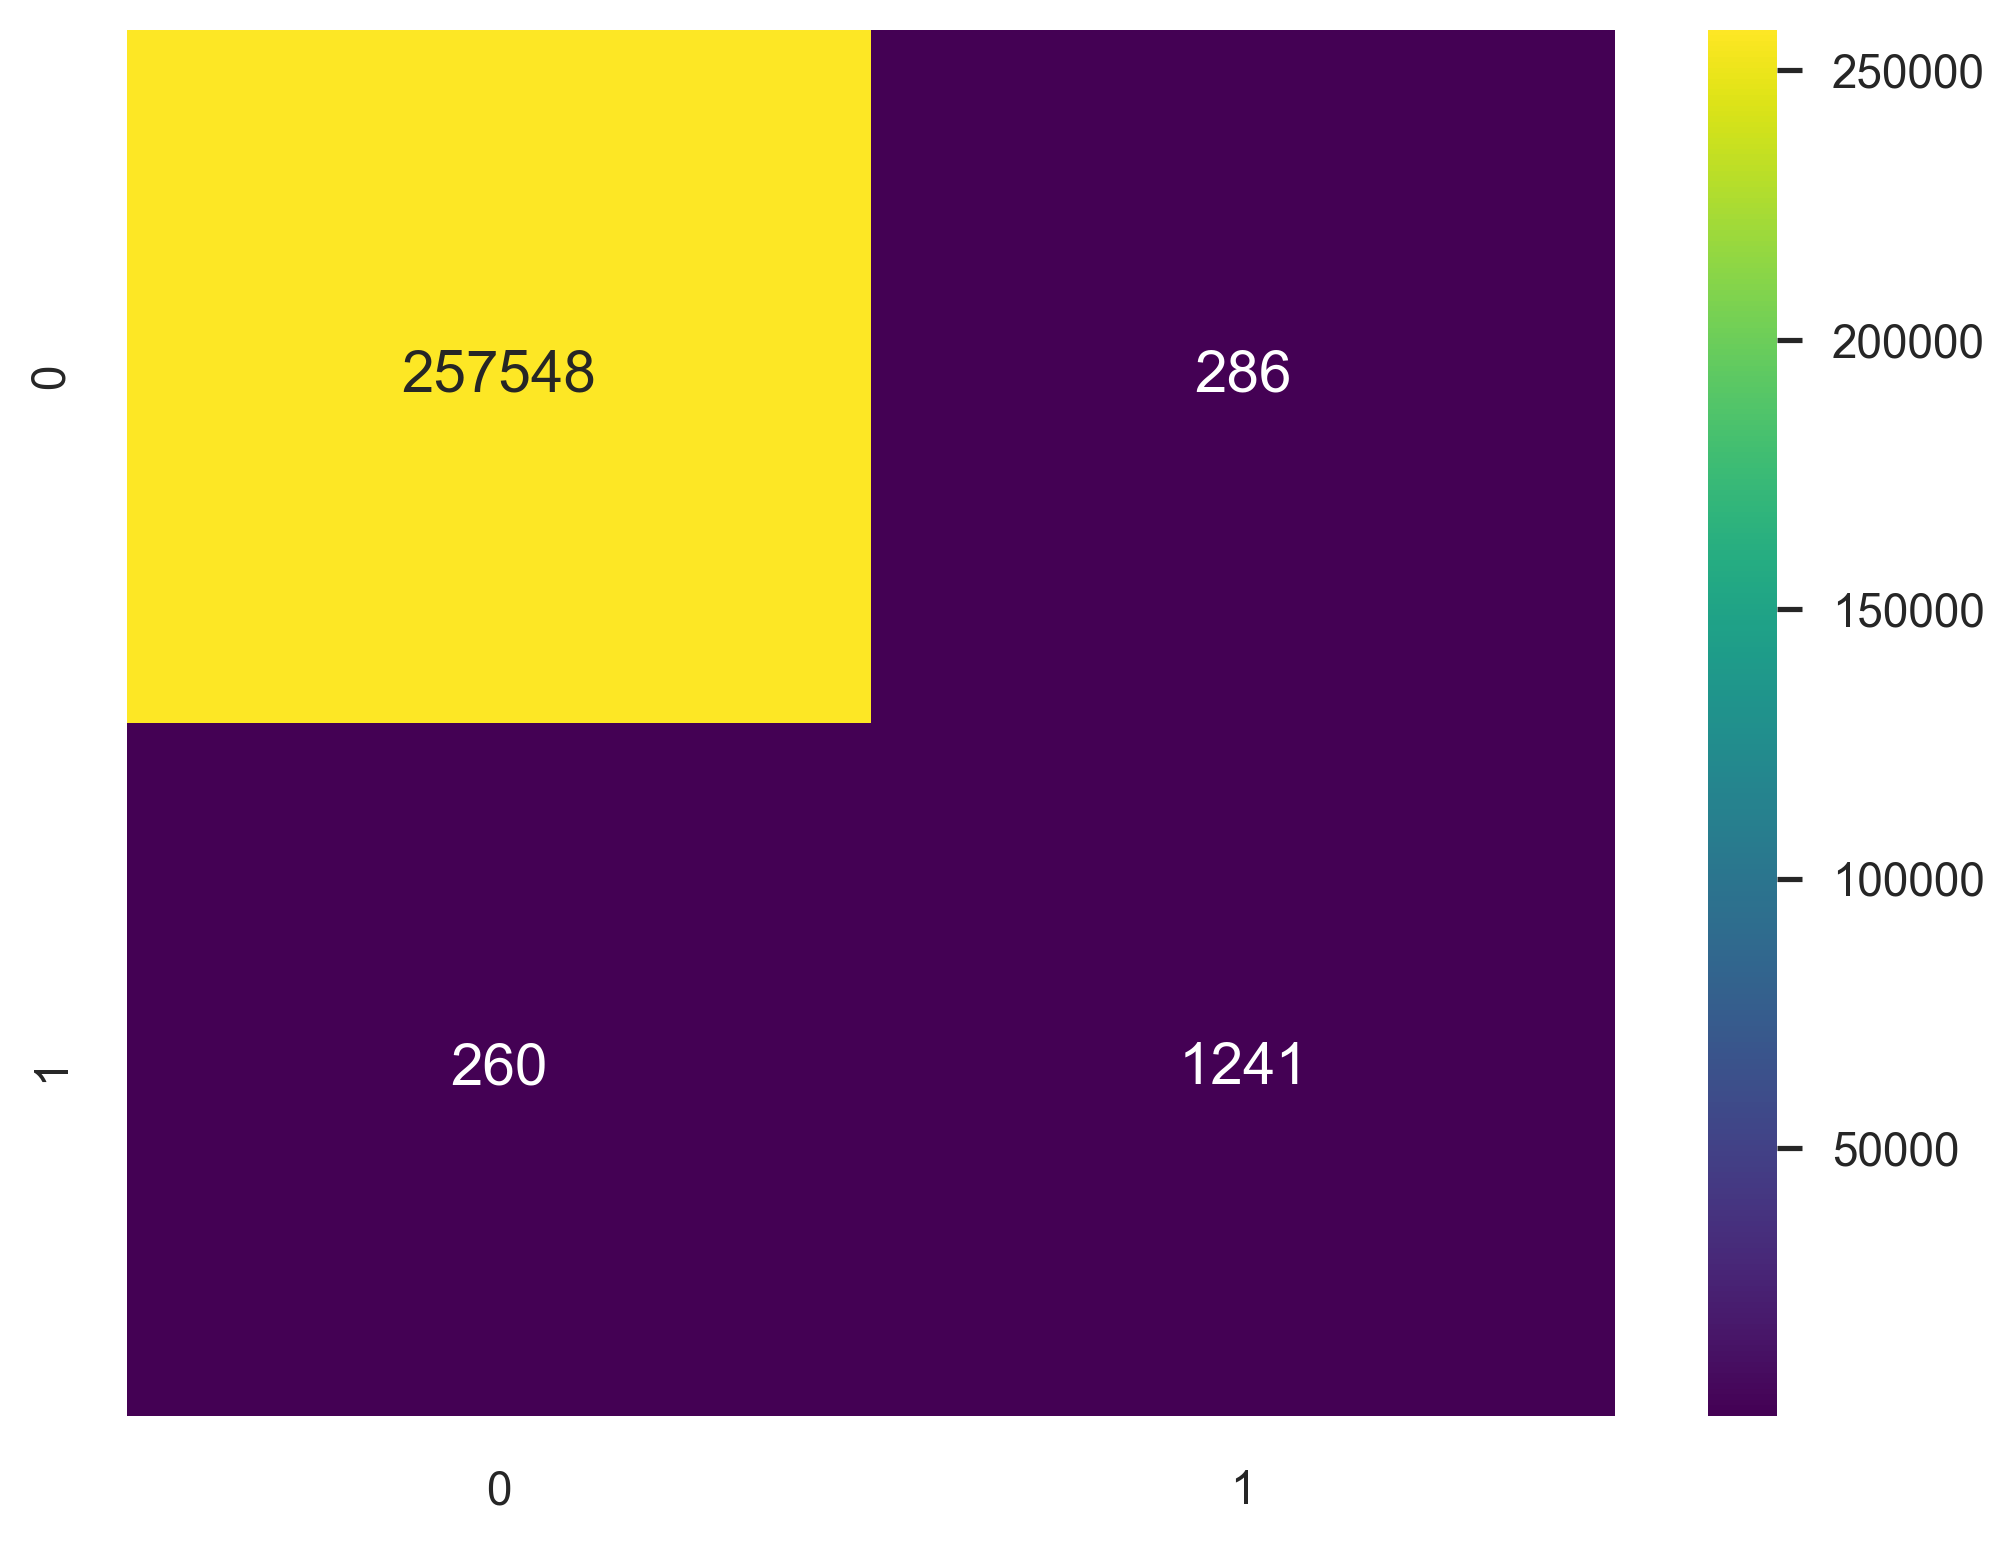

In [116]:
fig = plt.figure(figsize=(8,6))
cfs_matrix = confusion_matrix(y_test, y_pred)
print(cfs_matrix)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.81      0.83      0.82      1501

    accuracy                           1.00    259335
   macro avg       0.91      0.91      0.91    259335
weighted avg       1.00      1.00      1.00    259335



With DecisionTree we have F1-Score = **0.82** for label 1 

**SMOTE**

In [118]:
print("Before SMOTE:", Counter(y_train))

Before SMOTE: Counter({0: 1031335, 1: 6005})


In [120]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={1:48050}, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Before SMOTE: Counter({0: 1031335, 1: 6005})
After SMOTE: Counter({0: 1031335, 1: 48050})


In [121]:
class test_model:
    from sklearn.metrics import classification_report
    def __init__(self):
        self.metrics = ['prfs','auc','acc']

    def fit_predict(model, X_train, X_test, y_train, y_test):
        model = model
        model.fit(X_train, y_train) #Fit data to model
        y_pred = model.predict(X_test)
        return y_pred
    
    def evaluate(y_pred, metrics):
        results = {}
        for metric in metrics:
            if metric == 'prfs':
                prfs = classification_report(y_test, y_pred)
                results['prfs'] = prfs
            elif metric =='auc':
                auc_score = roc_auc_score(y_test, y_pred)
                results['auc'] = auc_score
            elif metric =='acc':
                results['acc'] = accuracy_score(y_test, y_pred)
            else:
                print('Not available metric!')
        return results

In [126]:
from sklearn.ensemble import RandomForestClassifier

# Specify your metric here
metrics = ['prfs']
print("=====================SMOTE=====================")
RDForest_eval = test_model.evaluate(y_pred=test_model.fit_predict(RandomForestClassifier(random_state=42),
                                                                  X_train_smote,
                                                                  X_test,
                                                                  y_train_smote,
                                                                  y_test
                                                                 ),
                                    metrics=metrics
                                    )

print("Random Forest model evaluate:\n", RDForest_eval['prfs'])

=====================SMOTE=====================
Random Forest model evaluate:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.94      0.82      0.87      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.91      0.94    259335
weighted avg       1.00      1.00      1.00    259335



With RandomForestClassifier we have better **F1-Score = 0.87** for label 1.

Try tuning some important Hyperparameters for RDF

In [127]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(random_grid)

{'n_estimators': [100, 133, 166, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [129]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, greater_is_better=True, pos_label=1)

The best estimator on randomized_search:  
RandomForestClassifier(max_features='sqrt', n_estimators=200)

In [153]:
rf_random = RandomForestClassifier(max_features='sqrt',
                                   n_estimators=200,
                                   random_state=41
                                   )

rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)


In [154]:
# Print reprort
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.97      0.76      0.85      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335



After tuning, we have **F1-Score = 0.85** for label 1, atually good :)

****Test Data Prediction****

In [155]:
fraud_test = scaler.fit_transform(fraud_test)

In [161]:
features = ['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
        'age', 'trans_date', 'trans_time']  
#
# X = df_train[features].set_index("transaction_id")
# Ensure the shape of fraud_test matches the number of features
fraud_test = pd.DataFrame(fraud_test[:, :len(features)], columns=features)

In [143]:
fraud_test

merchant  category       amt    gender      city     state       zip  \
0      -0.081638  0.733156 -1.560232  5.199338 -0.869846  0.776528 -0.582009   
1       1.088723  0.733156 -0.285024 -5.199338 -2.085356  1.239352  1.244778   
2       1.220640 -0.236799 -0.106219 -5.199338 -1.446104  0.258792 -1.467860   
3      -0.433482  0.522099  0.237012  5.199338  1.321946 -1.079690 -0.465405   
4      -0.172731  5.199338 -1.467860  5.199338 -0.529301 -0.315012  0.053973   
...          ...       ...       ...       ...       ...       ...       ...   
555714  0.656758 -0.236799 -0.063808  5.199338  0.064027 -0.161281  0.443006   
555715 -0.278302  0.193143  1.050062  5.199338 -0.045180  1.044409  0.981540   
555716  0.605955  0.193143  0.735053 -5.199338 -1.135284  1.525529  2.806711   
555717 -1.199945  5.199338 -0.824286  5.199338  0.163824 -0.821412  1.225943   
555718 -0.873515 -5.199338 -0.152967  5.199338 -0.607463  0.465405  0.748009   

             lat      long  city_pop       job  unix_time  merch_lat  \
0      -0.826698  0.611996  1.497997  0.196979  -5.199338  -0.824137   
1       0.207223 -1.278137 -1.218002  0.884593  -5.199338   0.012539   
2       0.303168  1.659093  0.812654  0.108103  -5.199338   0.267191   
3      -1.851734  0.622621  0.931971  1.053106  -5.199338  -1.808356   
4       1.215372  0.189310 -0.472407 -0.212353  -5.199338   1.390716   
...          ...       ...       ...       ...        ...        ...   
555714  0.252311 -0.328223 -0.907080  1.750222   5.199338   0.134402   
555715 -1.780005 -0.574595  0.766391 -0.198258   5.199338  -1.668898   
555716  1.700222 -1.629992  0.132113  0.296607   5.199338   1.767812   
555717  1.331018 -1.418119 -1.738731 -1.247505   5.199338   1.256212   
555718 -0.565738 -0.759677  1.142483  0.204660   5.199338  -0.468786   

        merch_long       age  trans_date  trans_time  
0         0.564180 -5.199338    0.475214   -5.199338  
1        -1.269106 -5.199338   -0.880888   -5.199338  
2         1.457825 -5.199338    0.340163   -5.199338  
3         0.613256 -5.199338   -0.711981   -5.199338  
4         0.131278 -5.199338    0.985610   -5.199338  
...            ...       ...         ...         ...  
555714   -0.286394 -5.199338    0.568686    5.199338  
555715   -0.635436 -5.199338   -1.910600    5.199338  
555716   -1.671789 -5.199338   -0.299230    5.199338  
555717   -1.442389 -5.199338    0.568686    5.199338  
555718   -0.712466 -5.199338   -1.192071    5.199338  

[555719 rows x 17 columns]

In [144]:
y_pred  = rf_random.predict(fraud_test)
y_proba = rf_random.predict_proba(fraud_test)[:, 1]

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [146]:
fraud_test["Fraud_Proba"] = y_proba
fraud_test["Fraud_Predict"] = y_pred

In [148]:
result = fraud_test[["Fraud_Proba", "Fraud_Predict"]]
# Store result in a CSV file 
result.to_csv(r"./PredictFraud_Result.csv")